<a href="https://colab.research.google.com/github/jcmm518/TFM/blob/main/TFM_Estadisticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portada - TFM - Juan Carlos Marin Mejia

## TFM
Nombre y Apellidos: **Juan Carlos Marin Mejia**   <br>

Asignatura        : **TFM** <br>

Asesor          : **Olivas Varela Jose Angel** <br>

Director          : **Colomer Granero Adrián** <br>

Universidad       : **Universidad internacional de valencia** <br>

Fecha             : **Octubre -2021** <br>

# Carga de folder base y librerias

In [1]:
# Configuracion Drive
BASE_FOLDER = '/content/drive/My Drive/TFM/'


from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Importamos librerias
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tarfile
import pickle
import csv
import io
import seaborn as sns
import calendar
import time
%matplotlib inline

# Include all packages

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn import metrics
from sklearn.tree import export_graphviz
import graphviz
from sklearn.preprocessing import LabelEncoder

# Carga del DF

In [3]:
# Cargamos DF 
dir = BASE_FOLDER + 'Siniestralidad_2010_2020.csv'
DF_Principal = pd.read_csv(dir, delimiter=",", parse_dates= [2,4,12], encoding='utf-8-sig')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (23,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Tratamiento de datos

Se cargan los datos de accidentalidad del departamento de transito, desde el año 2010 al año 2020.

Se inicia la etapa de tratamiento de datos

In [4]:
# Se realiza una previsualizacion de los 20 primeros registros
display(DF_Principal.head(20))

,NRO_RADICADO,DESC_CLASIFICACION,FECHA_ACCIDENTE,HORA_ACCIDENTE,FECHA_INGRESO_ACCIDENTE,REGISTRA_ACCIDENTE,NUMERO_PLACA,CLASE_VEHICULO,TIPO_SERVICIO,LLEVA,...,AREA_RURAL,DESC_SECTOR_ACCIDENTE,DESC_ZONA_ACCIDENTE,CONDICION_CLIMATICA,ESTADO_CALLE,ESTADO_CARRERA,CEDULA_DE_LOS_INVOLUCRADOS,CAUSA_ACCIDENTE,COMPLEMENTO,ESTADO_ACCIDENTE
0,2100001.0,Con croquis,2010-01-03,16:50:00,2010-01-06,42876928.0,GNV79B,MOTOCICLETA,PARTICULAR,CASCO,...,NaN,INDUSTRIAL,NO REPORTA,Normal,Bueno,Bueno,71825480,Transitar entre vehiculos,NO REPORTA,PEND. FALLADO
1,2100001.0,Con croquis,2010-01-03,16:50:00,2010-01-06,42876928.0,MMM124,CAMIONETA,PARTICULAR,CINTURON,...,NaN,INDUSTRIAL,NO REPORTA,Normal,Bueno,Bueno,71266256,Transitar entre vehiculos,NO REPORTA,PEND. FALLADO
2,2100001.0,Con croquis,2010-01-03,16:50:00,2010-01-06,42876928.0,ZQB19A,MOTOCICLETA,PARTICULAR,CASCO,...,NaN,INDUSTRIAL,NO REPORTA,Normal,Bueno,Bueno,71293976,Transitar entre vehiculos,NO REPORTA,PEND. FALLADO
3,2100002.0,Con croquis,2010-01-01,3:50:00,2010-01-06,42894441.0,KFA993,AUTOMOVIL,PARTICULAR,CINTURON,...,NaN,RESIDENCIAL,NO REPORTA,Normal,Bueno,Bueno,8345216,Transitar entre vehiculos,NO REPORTA,PEND. FALLADO
4,2100002.0,Con croquis,2010-01-01,3:50:00,2010-01-06,42894441.0,DIP08,MOTOCICLETA,PARTICULAR,CASCO,...,NaN,RESIDENCIAL,NO REPORTA,Normal,Bueno,Bueno,1037606839,Transitar entre vehiculos,NO REPORTA,PEND. FALLADO
5,2100003.0,Con croquis,2010-01-04,17:50:00,2010-01-06,43744162.0,SNP049,MICROBUS,PUBLICO,CINTURON,...,NaN,RESIDENCIAL,NO REPORTA,Normal,Bueno,Bueno,NaN,Cruzar sin observar,NO REPORTA,PEND. FALLADO
6,2100004.0,Con croquis,2010-01-01,9:00:00,2010-01-06,42868676.0,ECX16B,MOTOCICLETA,PARTICULAR,CASCO,...,NaN,RESIDENCIAL,NO REPORTA,Normal,Bueno,Bueno,71278886,Transitar entre vehiculos,NO REPORTA,PEND. FALLADO
7,2100005.0,Con croquis,2010-01-03,10:00:00,2010-01-06,42894441.0,BXE047,AUTOMOVIL,PARTICULAR,CINTURON,...,NaN,RESIDENCIAL,NO REPORTA,Normal,Bueno,Bueno,71294133,Desobedecer señales,NO REPORTA,PEND. FALLADO
8,2100005.0,Con croquis,2010-01-03,10:00:00,2010-01-06,42894441.0,TMZ758,AUTOMOVIL,PUBLICO,CINTURON,...,NaN,RESIDENCIAL,NO REPORTA,Normal,Bueno,Bueno,98541832,Desobedecer señales,NO REPORTA,PEND. FALLADO
9,2100006.0,Con croquis,2010-01-02,19:10:00,2010-01-06,43744162.0,CYY080,AUTOMOVIL,PARTICULAR,CINTURON,...,NaN,RESIDENCIAL,NO REPORTA,Normal,Bueno,Bueno,25095249,Desobedecer señales,NO REPORTA,PEND. FALLADO


Validacion de numero de registros del archivo entregado y validacion de columnas

In [5]:
# Se validan las columnas
print('Columnas encontradas \n')
DF_Principal.info()

# se valida el numero de registros del Datraframe
print('\n Se encontraron '+str(len(DF_Principal))+' registros en el archivo')


Columnas encontradas 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85526 entries, 0 to 85525
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   NRO_RADICADO                85422 non-null  float64       
 1   DESC_CLASIFICACION          85422 non-null  object        
 2   FECHA_ACCIDENTE             85422 non-null  datetime64[ns]
 3   HORA_ACCIDENTE              85422 non-null  object        
 4   FECHA_INGRESO_ACCIDENTE     85422 non-null  datetime64[ns]
 5   REGISTRA_ACCIDENTE          84232 non-null  float64       
 6   NUMERO_PLACA                85422 non-null  object        
 7   CLASE_VEHICULO              85163 non-null  object        
 8   TIPO_SERVICIO               84999 non-null  object        
 9   LLEVA                       85422 non-null  object        
 10  RAZON_SOCIAL                85422 non-null  object        
 11  TIPO_VICTIMA                159

Se validan los tipos de datos almacenados en las columnas

In [6]:
DF_Principal.dtypes

NRO_RADICADO                         float64
DESC_CLASIFICACION                    object
FECHA_ACCIDENTE               datetime64[ns]
HORA_ACCIDENTE                        object
FECHA_INGRESO_ACCIDENTE       datetime64[ns]
REGISTRA_ACCIDENTE                   float64
NUMERO_PLACA                          object
CLASE_VEHICULO                        object
TIPO_SERVICIO                         object
LLEVA                                 object
RAZON_SOCIAL                          object
TIPO_VICTIMA                          object
FECHA_NACIMIENTO              datetime64[ns]
EDAD                                 float64
GENERO                                object
GRAVEDAD                              object
NRO_VICTIMA_Peaton                   float64
NRO_VICTIMA_ACOMPANANTE              float64
NRO_VICTIMA_PASAJERO                 float64
NRO_VICTIMA_CONDUCTOR                float64
NRO_VICTIMA_HERIDO                   float64
NRO_VICTIMA_MUERTO                   float64
ESTADO_BEO

Se realiza descripcion de la base de datos para revisar las estadisticas principales y generar un insumo viable para el tratamiento de datos

In [7]:
DF_Principal.describe()

,NRO_RADICADO,REGISTRA_ACCIDENTE,EDAD,NRO_VICTIMA_Peaton,NRO_VICTIMA_ACOMPANANTE,NRO_VICTIMA_PASAJERO,NRO_VICTIMA_CONDUCTOR,NRO_VICTIMA_HERIDO,NRO_VICTIMA_MUERTO,ESTADO_BEODEZ,RESULTADO_BEODEZ,RESUL_BEODEZ_GRAMOS
count,8.542200e+04,8.423200e+04,12546.000000,2204.0,1033.0,2741.0,9355.0,15749.0,222.0,85422.000000,85422.000000,75891.000000
mean,2.154515e+06,2.294542e+08,33.728200,1.0,1.0,1.0,1.0,1.0,1.0,0.002880,0.005795,0.395739
std,7.509817e+04,3.751715e+08,16.489109,0.0,0.0,0.0,0.0,0.0,0.0,0.053587,0.116639,7.611498
min,2.100001e+06,3.474282e+06,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000
25%,2.123955e+06,4.289444e+07,22.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000
50%,2.153008e+06,4.374416e+07,29.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000
75%,2.182216e+06,9.855216e+07,43.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000
max,2.199344e+07,1.037604e+09,118.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,4.000000,450.000000


Debido a que nuestro primer objetivo es realizar un tratamiento de datos adecuado, que permita que el archivo fuente (de donde provenga) se adapta a nuestros algororitmos, dedemos partir de la descripcion estadistica de la funete e iniciar con una depuracion paso a paso hasta obtener el resultado final

1. se valida que no existan registros en nulos, en caso de existir, estos se eliminan

In [8]:
# se procede a validar si existen nulos
Existen_Nulos = DF_Principal.isnull().values.any()
print("existen nulos en data frame ? : "+ str(Existen_Nulos))

existen nulos en data frame ? : True


In [9]:
Df_Resul = DF_Principal.copy()
if Existen_Nulos :
  # se inicia con el analisis general, lo que quiere decir que se identifican si vienen registros donde los campos principales
  # del analisis como radicado, fecha y hora de accidente, clase de vehiculo,tipo de servicio, edad y genero de la victima 
  # y direccion  son nulos y se procede a eliminar todo el registro, debido a que no tiene sentido tener un registro sin ningun valor
  contador = 0
  for i in range(len(Df_Resul)): 
    if pd.isnull(Df_Resul.loc[i,"NRO_RADICADO"]) and pd.isnull(Df_Resul.loc[i,"DESC_CLASIFICACION"])  and pd.isnull(Df_Resul.loc[i,"FECHA_ACCIDENTE"]) and pd.isnull(Df_Resul.loc[i,"HORA_ACCIDENTE"]) and pd.isnull(Df_Resul.loc[i,"CLASE_VEHICULO"]) and pd.isnull(Df_Resul.loc[i,"TIPO_SERVICIO"]) and pd.isnull(Df_Resul.loc[i,"EDAD"]) and pd.isnull(Df_Resul.loc[i,"GENERO"]) and pd.isnull(Df_Resul.loc[i,"DIRECCION_CARACT_VIA"]):
      Df_Resul.drop([i],axis=0,inplace=True)
      contador = contador + 1

  print('Registros eliminados que no aportan al analisis: '+ str(contador))


Registros eliminados que no aportan al analisis: 104


In [10]:
# Se valida el campo EDAD

# Se encuentran registros de EDAD sin valor, pero con la fecha de nacimiento, se procede a calcularlo
numerodias = 365.2425

# se recalculan las edades con las fechas de nacimiento
Df_Resul['EDAD'] = (Df_Resul['FECHA_ACCIDENTE'] - Df_Resul['FECHA_NACIMIENTO']).dt.days
Df_Resul['EDAD'] = Df_Resul['EDAD'] / numerodias

RegSinEdad = len(Df_Resul[pd.isnull(Df_Resul.EDAD)])
RegTotales = len(Df_Resul.NRO_RADICADO)
RegConEdad = RegTotales - RegSinEdad

#Adicionar año y mes para todos los analisis
Df_Resul['Anio'] =      Df_Resul['FECHA_ACCIDENTE'].dt.year.astype(str)
Df_Resul['MesStr'] =    Df_Resul['FECHA_ACCIDENTE'].dt.month.astype(str)
Df_Resul['Mes'] =       Df_Resul['FECHA_ACCIDENTE'].dt.month.astype(int)
Df_Resul['NombreMes'] = Df_Resul['Mes'].apply(lambda x: calendar.month_name[x])
Df_Resul['Dia'] = Df_Resul['FECHA_ACCIDENTE'].apply(lambda x: x.strftime("%A"))                                                                    
Df_Resul['Registro'] = 1 

# analisis por rango de edades
# definomos los rangos de edad de la siguiente forma
# 0- 18 Menores (grupo 1)
# 19- 25 Jovenes (grupo 2)
# 26- 35 adultos (grupo 3)
# 36- 45 mayores (grupo 4)
# 46- 60 Adultos Mayores (grupo 5)
# 61- 100 ancianos (grupo 6)

bins=[0,18,25,35,45,60,100]
names = ['1','2','3','4','5','6']
names2 =['Menores','Jovenes','Adultos','Mayores','Adultos Mayores','Ancianos']
Df_Resul['Rango_edad'] = pd.cut(Df_Resul['EDAD'],bins,labels=names)
Df_Resul['Rango_edad_Des'] = pd.cut(Df_Resul['EDAD'],bins,labels=names2)

# Rangos horarios ( por jornada)
bins=[1,5,8,11,14,16,19,22,24]
names=['Madrugada','Pico Mañana','Mañana','Hora Almuerzo','Tarde','Pico Tarde','Noche','Tarde Noche']

#Completar las horas a 8 caracteres
completar=Df_Resul[Df_Resul['HORA_ACCIDENTE'].str.len() == 7]
completar['HORA_ACCIDENTE'] = '0' + completar['HORA_ACCIDENTE']
Df_Resul[Df_Resul['HORA_ACCIDENTE'].str.len() == 7] = completar
Df_Resul['HoraSola'] = Df_Resul['HORA_ACCIDENTE'].str[0:2].astype(int)

Df_Resul['Rango_Horas'] = pd.cut(Df_Resul['HoraSola'],bins,labels=names)


# Rangos horarios 2 ( cada 3 horas)

bins=[0,3,6,9,12,15,18,21,24]
names=['0-3','3-6','6-9','9-12','12-15','15-18','18-21','21-24']

#Completar las horas a 8 caracteres
completar=Df_Resul[Df_Resul['HORA_ACCIDENTE'].str.len() == 7]
completar['HORA_ACCIDENTE'] = '0' + completar['HORA_ACCIDENTE']
Df_Resul[Df_Resul['HORA_ACCIDENTE'].str.len() == 7] = completar
Df_Resul['HoraSola'] = Df_Resul['HORA_ACCIDENTE'].str[0:2].astype(int)

Df_Resul['Rango_Horas2'] = pd.cut(Df_Resul['HoraSola'],bins,labels=names)


# funcion para completar fechas del data frame
def completar_fechas(df) : 
    #df: dataframe
    completar=df[df['MesStr'].str.len() == 1]
    completar['MesStr'] = '0' + completar['MesStr']
    df[df['MesStr'].str.len() == 1] = completar
    df['AnioMes'] = df['Anio'] + df['MesStr']
    return df

Df_Resul = completar_fechas(Df_Resul)

print('Total de registros existentes          :'+str(RegTotales) + ' \n')
print('Total de registros sin edad registrada :'+str(RegSinEdad) + ' \n')
print('Total de registros con edad registrada :'+str(RegConEdad) + ' \n')

print('Por lo anterior, las estadisticas de edad, solo se calcularan para '+str(round(RegConEdad/RegTotales,2)*100) + ' % de los datos \n')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Total de registros existentes          :85422 

Total de registros sin edad registrada :69460 

Total de registros con edad registrada :15962 

Por lo anterior, las estadisticas de edad, solo se calcularan para 19.0 % de los datos 



In [11]:
display(Df_Resul.head(20))

,NRO_RADICADO,DESC_CLASIFICACION,FECHA_ACCIDENTE,HORA_ACCIDENTE,FECHA_INGRESO_ACCIDENTE,REGISTRA_ACCIDENTE,NUMERO_PLACA,CLASE_VEHICULO,TIPO_SERVICIO,LLEVA,...,Mes,NombreMes,Dia,Registro,Rango_edad,Rango_edad_Des,HoraSola,Rango_Horas,Rango_Horas2,AnioMes
0,2100001.0,Con croquis,2010-01-03,16:50:00,2010-01-06,42876928.0,GNV79B,MOTOCICLETA,PARTICULAR,CASCO,...,1,January,Sunday,1,NaN,NaN,16,Tarde,15-18,201001
1,2100001.0,Con croquis,2010-01-03,16:50:00,2010-01-06,42876928.0,MMM124,CAMIONETA,PARTICULAR,CINTURON,...,1,January,Sunday,1,NaN,NaN,16,Tarde,15-18,201001
2,2100001.0,Con croquis,2010-01-03,16:50:00,2010-01-06,42876928.0,ZQB19A,MOTOCICLETA,PARTICULAR,CASCO,...,1,January,Sunday,1,2,Jovenes,16,Tarde,15-18,201001
3,2100002.0,Con croquis,2010-01-01,03:50:00,2010-01-06,42894441.0,KFA993,AUTOMOVIL,PARTICULAR,CINTURON,...,1,January,Friday,1,NaN,NaN,3,Madrugada,0-3,201001
4,2100002.0,Con croquis,2010-01-01,03:50:00,2010-01-06,42894441.0,DIP08,MOTOCICLETA,PARTICULAR,CASCO,...,1,January,Friday,1,2,Jovenes,3,Madrugada,0-3,201001
5,2100003.0,Con croquis,2010-01-04,17:50:00,2010-01-06,43744162.0,SNP049,MICROBUS,PUBLICO,CINTURON,...,1,January,Monday,1,6,Ancianos,17,Pico Tarde,15-18,201001
6,2100004.0,Con croquis,2010-01-01,09:00:00,2010-01-06,42868676.0,ECX16B,MOTOCICLETA,PARTICULAR,CASCO,...,1,January,Friday,1,2,Jovenes,9,Mañana,6-9,201001
7,2100005.0,Con croquis,2010-01-03,10:00:00,2010-01-06,42894441.0,BXE047,AUTOMOVIL,PARTICULAR,CINTURON,...,1,January,Sunday,1,NaN,NaN,10,Mañana,9-12,201001
8,2100005.0,Con croquis,2010-01-03,10:00:00,2010-01-06,42894441.0,TMZ758,AUTOMOVIL,PUBLICO,CINTURON,...,1,January,Sunday,1,NaN,NaN,10,Mañana,9-12,201001
9,2100006.0,Con croquis,2010-01-02,19:10:00,2010-01-06,43744162.0,CYY080,AUTOMOVIL,PARTICULAR,CINTURON,...,1,January,Saturday,1,NaN,NaN,19,Pico Tarde,18-21,201001


In [12]:
# se procede a rellenar los otros campos cuando estan en Null


# Columna DESC_CLASIFICACION
if len(Df_Resul[pd.isnull(Df_Resul.DESC_CLASIFICACION)]) > 0 :
  Cantidad = len(Df_Resul[pd.isnull(Df_Resul.DESC_CLASIFICACION)])
  Df_Resul['DESC_CLASIFICACION'] = Df_Resul['DESC_CLASIFICACION'].fillna('NA')
  print('Se encontraron '+str(Cantidad)+' registros sin clasificacion')

# Columna FECHA_ACCIDENTE
if len(Df_Resul[pd.isnull(Df_Resul.FECHA_ACCIDENTE)]) > 0 :
  Cantidad = len(Df_Resul[pd.isnull(Df_Resul.FECHA_ACCIDENTE)])
  Df_Resul['FECHA_ACCIDENTE'] = Df_Resul['FECHA_ACCIDENTE'].fillna(Df_Resul['FECHA_INGRESO_ACCIDENTE'])
  print('Se encontraron '+str(Cantidad)+' registros sin fecha de accidente')

# Columna HORA_ACCIDENTE
if len(Df_Resul[pd.isnull(Df_Resul.HORA_ACCIDENTE)]) > 0 :
  Cantidad = len(Df_Resul[pd.isnull(Df_Resul.HORA_ACCIDENTE)])
  Df_Resul['HORA_ACCIDENTE'] = Df_Resul['HORA_ACCIDENTE'].fillna('0:00:00')
  print('Se encontraron '+str(Cantidad)+' registros sin hora  de accidente')

# Columna REGISTRA_ACCIDENTE
if len(Df_Resul[pd.isnull(Df_Resul.REGISTRA_ACCIDENTE)]) > 0 :
  Cantidad = len(Df_Resul[pd.isnull(Df_Resul.REGISTRA_ACCIDENTE)])
  Df_Resul['REGISTRA_ACCIDENTE'] = Df_Resul['REGISTRA_ACCIDENTE'].fillna(99999999)
  print('Se encontraron '+str(Cantidad)+' registros sin cedula de agente registrado')

# Columna CLASE_VEHICULO
if len(Df_Resul[pd.isnull(Df_Resul.CLASE_VEHICULO)]) > 0 :
  Cantidad = len(Df_Resul[pd.isnull(Df_Resul.CLASE_VEHICULO)])
  Df_Resul['CLASE_VEHICULO'] = Df_Resul['CLASE_VEHICULO'].fillna('Sin Asignar')
  print('Se encontraron '+str(Cantidad)+' registros sin clase de vehiculo registrado')

# Columna TIPO_SERVICIO
if len(Df_Resul[pd.isnull(Df_Resul.TIPO_SERVICIO)]) > 0 :
  Cantidad = len(Df_Resul[pd.isnull(Df_Resul.TIPO_SERVICIO)])
  Df_Resul['TIPO_SERVICIO'] = Df_Resul['TIPO_SERVICIO'].fillna('Sin Asignar')
  print('Se encontraron '+str(Cantidad)+' registros sin tipo de servicio registrado')

# Columna lleva
if len(Df_Resul[pd.isnull(Df_Resul.LLEVA)]) > 0 :
  Cantidad = len(Df_Resul[pd.isnull(Df_Resul.LLEVA)])
  Df_Resul['LLEVA'] = Df_Resul['LLEVA'].fillna('Sin Asignar')
  print('Se encontraron '+str(Cantidad)+' registros sin indicar si lleva elementos registrado')

# Columna RAZON_SOCIAL
if len(Df_Resul[pd.isnull(Df_Resul.RAZON_SOCIAL)]) > 0 :
  Cantidad = len(Df_Resul[pd.isnull(Df_Resul.RAZON_SOCIAL)])
  Df_Resul['RAZON_SOCIAL'] = Df_Resul['RAZON_SOCIAL'].fillna('Sin Asignar')
  print('Se encontraron '+str(Cantidad)+' registros sin razon social registrado')

# Columna TIPO_VICTIMA
if len(Df_Resul[pd.isnull(Df_Resul.TIPO_VICTIMA)]) > 0 :
  Cantidad = len(Df_Resul[pd.isnull(Df_Resul.TIPO_VICTIMA)])
  Df_Resul['TIPO_VICTIMA'] = Df_Resul['TIPO_VICTIMA'].fillna('Sin Victimas')
  print('Se encontraron '+str(Cantidad)+' registros sin victimas registrado')


# Columna GENERO
if len(Df_Resul[pd.isnull(Df_Resul.GENERO)]) > 0 :
  Cantidad = len(Df_Resul[pd.isnull(Df_Resul.GENERO)])
  Df_Resul['GENERO'] = Df_Resul['GENERO'].fillna('No Registra')
  print('Se encontraron '+str(Cantidad)+' registros sin genero registrado')

# Columna GRAVEDAD
if len(Df_Resul[pd.isnull(Df_Resul.GRAVEDAD)]) > 0 :
  Cantidad = len(Df_Resul[pd.isnull(Df_Resul.GRAVEDAD)])
  Df_Resul['GRAVEDAD'] = Df_Resul['GRAVEDAD'].fillna('No Registra')
  print('Se encontraron '+str(Cantidad)+' registros sin gravedad registrado')


# Columna NRO_VICTIMA_Peaton
if len(Df_Resul[pd.isnull(Df_Resul.NRO_VICTIMA_Peaton)]) > 0 :
  Cantidad = len(Df_Resul[pd.isnull(Df_Resul.NRO_VICTIMA_Peaton)])
  Df_Resul['NRO_VICTIMA_Peaton'] = Df_Resul['NRO_VICTIMA_Peaton'].fillna(0)
  print('Se encontraron '+str(Cantidad)+' registros sin Numero de victimas de peatones')

# Columna NRO_VICTIMA_ACOMPANANTE
if len(Df_Resul[pd.isnull(Df_Resul.NRO_VICTIMA_ACOMPANANTE)]) > 0 :
  Cantidad = len(Df_Resul[pd.isnull(Df_Resul.NRO_VICTIMA_ACOMPANANTE)])
  Df_Resul['NRO_VICTIMA_ACOMPANANTE'] = Df_Resul['NRO_VICTIMA_ACOMPANANTE'].fillna(0)
  print('Se encontraron '+str(Cantidad)+' registros sin Numero de victimas de acompañantes')

# Columna NRO_VICTIMA_PASAJERO
if len(Df_Resul[pd.isnull(Df_Resul.NRO_VICTIMA_PASAJERO)]) > 0 :
  Cantidad = len(Df_Resul[pd.isnull(Df_Resul.NRO_VICTIMA_PASAJERO)])
  Df_Resul['NRO_VICTIMA_PASAJERO'] = Df_Resul['NRO_VICTIMA_PASAJERO'].fillna(0)
  print('Se encontraron '+str(Cantidad)+' registros sin Numero de victimas de pasajeros')


# Columna NRO_VICTIMA_CONDUCTOR
if len(Df_Resul[pd.isnull(Df_Resul.NRO_VICTIMA_CONDUCTOR)]) > 0 :
  Cantidad = len(Df_Resul[pd.isnull(Df_Resul.NRO_VICTIMA_CONDUCTOR)])
  Df_Resul['NRO_VICTIMA_CONDUCTOR'] = Df_Resul['NRO_VICTIMA_CONDUCTOR'].fillna(0)
  print('Se encontraron '+str(Cantidad)+' registros sin Numero de victimas de conductor')

# Columna NRO_VICTIMA_MUERTO
if len(Df_Resul[pd.isnull(Df_Resul.NRO_VICTIMA_MUERTO)]) > 0 :
  Cantidad = len(Df_Resul[pd.isnull(Df_Resul.NRO_VICTIMA_MUERTO)])
  Df_Resul['NRO_VICTIMA_MUERTO'] = Df_Resul['NRO_VICTIMA_MUERTO'].fillna(0)
  print('Se encontraron '+str(Cantidad)+' registros sin Numero de victimas muertos'  )


# Columna NRO_VICTIMA_HERIDO
if len(Df_Resul[pd.isnull(Df_Resul.NRO_VICTIMA_HERIDO)]) > 0 :
  Cantidad = len(Df_Resul[pd.isnull(Df_Resul.NRO_VICTIMA_HERIDO)])
  Df_Resul['NRO_VICTIMA_HERIDO'] = Df_Resul['NRO_VICTIMA_HERIDO'].fillna(0)
  print('Se encontraron '+str(Cantidad)+' registros sin Numero de victimas de Heridos' )        

# Columna ESTADO_DROGA
contador=0
for i in range(len(Df_Resul)): 
    if Df_Resul.loc[i,"ESTADO_DROGA"] == 0 :
      Df_Resul.loc[i,"ESTADO_DROGA"] ='N'
      contador = contador + 1
print('Se encontraron '+str(contador)+' registros sin estado de drogadicion')

# Columna RESUL_BEODEZ_GRAMOS
if len(Df_Resul[pd.isnull(Df_Resul.RESUL_BEODEZ_GRAMOS)]) > 0 :
  Cantidad = len(Df_Resul[pd.isnull(Df_Resul.RESUL_BEODEZ_GRAMOS)])
  Df_Resul['RESUL_BEODEZ_GRAMOS'] = Df_Resul['RESUL_BEODEZ_GRAMOS'].fillna(0)
  print('Se encontraron '+str(Cantidad)+' registros sin resultado de beodez en gramos' )

# Columna INFRACTOR
if len(Df_Resul[pd.isnull(Df_Resul.INFRACTOR)]) > 0 :
  Cantidad = len(Df_Resul[pd.isnull(Df_Resul.INFRACTOR)])
  Df_Resul['INFRACTOR'] = Df_Resul['INFRACTOR'].fillna('NR')
  print('Se encontraron '+str(Cantidad)+' registros sin datos de infractor')


# Columna DIRECCION_CARACT_VIA
if len(Df_Resul[pd.isnull(Df_Resul.DIRECCION_CARACT_VIA)]) > 0 :
  Cantidad = len(Df_Resul[pd.isnull(Df_Resul.DIRECCION_CARACT_VIA)])
  Df_Resul['DIRECCION_CARACT_VIA'] = Df_Resul['DIRECCION_CARACT_VIA'].fillna('NR')
  print('Se encontraron '+str(Cantidad)+' registros sin datos de direccion')

# Columna AREA_RURAL
if len(Df_Resul[pd.isnull(Df_Resul.AREA_RURAL)]) > 0 :
  Cantidad = len(Df_Resul[pd.isnull(Df_Resul.AREA_RURAL)])
  Df_Resul['AREA_RURAL'] = Df_Resul['AREA_RURAL'].fillna('NR')
  print('Se encontraron '+str(Cantidad)+' registros sin datos de Area rural')

# Columna DESC_SECTOR_ACCIDENTE
if len(Df_Resul[pd.isnull(Df_Resul.DESC_SECTOR_ACCIDENTE)]) > 0 :
  Cantidad = len(Df_Resul[pd.isnull(Df_Resul.DESC_SECTOR_ACCIDENTE)])
  Df_Resul['DESC_SECTOR_ACCIDENTE'] = Df_Resul['DESC_SECTOR_ACCIDENTE'].fillna('NO REPORTADO')
  print('Se encontraron '+str(Cantidad)+' registros sin datos de Sector del accidente')

# Columna CONDICION_CLIMATICA
if len(Df_Resul[pd.isnull(Df_Resul.CONDICION_CLIMATICA)]) > 0 :
  Cantidad = len(Df_Resul[pd.isnull(Df_Resul.CONDICION_CLIMATICA)])
  Df_Resul['CONDICION_CLIMATICA'] = Df_Resul['CONDICION_CLIMATICA'].fillna('NR')
  print('Se encontraron '+str(Cantidad)+' registros sin datos de condicion climatica' )

# Columna ESTADO_CALLE
if len(Df_Resul[pd.isnull(Df_Resul.ESTADO_CALLE)]) > 0 :
  Cantidad = len(Df_Resul[pd.isnull(Df_Resul.ESTADO_CALLE)])
  Df_Resul['ESTADO_CALLE'] = Df_Resul['ESTADO_CALLE'].fillna('NO REPORTA')
  print('Se encontraron '+str(Cantidad)+' registros sin datos de estado de la calle' )

# Columna CEDULA_DE_LOS_INVOLUCRADOS
if len(Df_Resul[pd.isnull(Df_Resul.CEDULA_DE_LOS_INVOLUCRADOS)]) > 0 :
  Cantidad = len(Df_Resul[pd.isnull(Df_Resul.CEDULA_DE_LOS_INVOLUCRADOS)])
  Df_Resul['CEDULA_DE_LOS_INVOLUCRADOS'] = Df_Resul['CEDULA_DE_LOS_INVOLUCRADOS'].fillna('NN')
  print('Se encontraron '+str(Cantidad)+' registros sin datos de cedula de involucrados' )

# Columna ESTADO_CARRERA
if len(Df_Resul[pd.isnull(Df_Resul.ESTADO_CARRERA)]) > 0 :
  Cantidad = len(Df_Resul[pd.isnull(Df_Resul.ESTADO_CARRERA)])
  Df_Resul['ESTADO_CARRERA'] = Df_Resul['ESTADO_CARRERA'].fillna('NO REPORTA')
  print('Se encontraron '+str(Cantidad)+' registros sin datos de estado de la carretera' )



Se encontraron 1190 registros sin cedula de agente registrado
Se encontraron 259 registros sin clase de vehiculo registrado
Se encontraron 423 registros sin tipo de servicio registrado
Se encontraron 69450 registros sin victimas registrado
Se encontraron 69485 registros sin genero registrado
Se encontraron 69450 registros sin gravedad registrado
Se encontraron 83218 registros sin Numero de victimas de peatones
Se encontraron 84389 registros sin Numero de victimas de acompañantes
Se encontraron 82681 registros sin Numero de victimas de pasajeros
Se encontraron 76067 registros sin Numero de victimas de conductor
Se encontraron 85200 registros sin Numero de victimas muertos
Se encontraron 69673 registros sin Numero de victimas de Heridos
Se encontraron 36270 registros sin estado de drogadicion
Se encontraron 9531 registros sin resultado de beodez en gramos
Se encontraron 15535 registros sin datos de infractor
Se encontraron 10 registros sin datos de direccion
Se encontraron 80399 registro

In [13]:
Df_Resul.describe()

,NRO_RADICADO,REGISTRA_ACCIDENTE,EDAD,NRO_VICTIMA_Peaton,NRO_VICTIMA_ACOMPANANTE,NRO_VICTIMA_PASAJERO,NRO_VICTIMA_CONDUCTOR,NRO_VICTIMA_HERIDO,NRO_VICTIMA_MUERTO,ESTADO_BEODEZ,RESULTADO_BEODEZ,RESUL_BEODEZ_GRAMOS,Mes,Registro,HoraSola
count,8.542200e+04,8.542200e+04,15962.000000,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,85422.0,85422.000000
mean,2.154515e+06,2.276508e+08,33.392739,0.025801,0.012093,0.032088,0.109515,0.184367,0.002599,0.002880,0.005795,0.351584,6.532041,1.0,13.253038
std,7.509817e+04,3.728579e+08,15.573496,0.158543,0.109301,0.176234,0.312286,0.387785,0.050913,0.053587,0.116639,7.175391,3.428461,0.0,4.963705
min,2.100001e+06,3.474282e+06,0.065710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000
25%,2.123955e+06,4.289444e+07,22.404293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.0,10.000000
50%,2.153008e+06,4.374416e+07,28.875336,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.0,14.000000
75%,2.182216e+06,9.855216e+07,41.569642,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.0,17.000000
max,2.199344e+07,1.037604e+09,118.589704,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,450.000000,12.000000,1.0,23.000000


In [14]:
display(Df_Resul)

,NRO_RADICADO,DESC_CLASIFICACION,FECHA_ACCIDENTE,HORA_ACCIDENTE,FECHA_INGRESO_ACCIDENTE,REGISTRA_ACCIDENTE,NUMERO_PLACA,CLASE_VEHICULO,TIPO_SERVICIO,LLEVA,...,Mes,NombreMes,Dia,Registro,Rango_edad,Rango_edad_Des,HoraSola,Rango_Horas,Rango_Horas2,AnioMes
0,2100001.0,Con croquis,2010-01-03,16:50:00,2010-01-06,4.287693e+07,GNV79B,MOTOCICLETA,PARTICULAR,CASCO,...,1,January,Sunday,1,NaN,NaN,16,Tarde,15-18,201001
1,2100001.0,Con croquis,2010-01-03,16:50:00,2010-01-06,4.287693e+07,MMM124,CAMIONETA,PARTICULAR,CINTURON,...,1,January,Sunday,1,NaN,NaN,16,Tarde,15-18,201001
2,2100001.0,Con croquis,2010-01-03,16:50:00,2010-01-06,4.287693e+07,ZQB19A,MOTOCICLETA,PARTICULAR,CASCO,...,1,January,Sunday,1,2,Jovenes,16,Tarde,15-18,201001
3,2100002.0,Con croquis,2010-01-01,03:50:00,2010-01-06,4.289444e+07,KFA993,AUTOMOVIL,PARTICULAR,CINTURON,...,1,January,Friday,1,NaN,NaN,3,Madrugada,0-3,201001
4,2100002.0,Con croquis,2010-01-01,03:50:00,2010-01-06,4.289444e+07,DIP08,MOTOCICLETA,PARTICULAR,CASCO,...,1,January,Friday,1,2,Jovenes,3,Madrugada,0-3,201001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,2202219.0,Con croquis,2020-12-29,13:35:00,2021-01-06,9.855216e+07,XID19D,MOTOCICLETA,PARTICULAR,CASCO,...,12,December,Tuesday,1,4,Mayores,13,Hora Almuerzo,12-15,202012
85418,2202219.0,Con croquis,2020-12-29,13:35:00,2021-01-06,9.855216e+07,TCN49C,MOTOCICLETA,PARTICULAR,CASCO,...,12,December,Tuesday,1,5,Adultos Mayores,13,Hora Almuerzo,12-15,202012
85419,2202220.0,Con croquis,2020-12-31,11:50:00,2021-01-06,9.855216e+07,JKL638,AUTOMOVIL,PARTICULAR,CINTURÓN,...,12,December,Thursday,1,NaN,NaN,11,Mañana,9-12,202012
85420,2202220.0,Con croquis,2020-12-31,11:50:00,2021-01-06,9.855216e+07,KHS639,AUTOMOVIL,PARTICULAR,CINTURÓN,...,12,December,Thursday,1,NaN,NaN,11,Mañana,9-12,202012


In [15]:
# analizamos columnas, nulos y tipos de datos
Df_Resul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85422 entries, 0 to 85421
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   NRO_RADICADO                85422 non-null  float64       
 1   DESC_CLASIFICACION          85422 non-null  object        
 2   FECHA_ACCIDENTE             85422 non-null  datetime64[ns]
 3   HORA_ACCIDENTE              85422 non-null  object        
 4   FECHA_INGRESO_ACCIDENTE     85422 non-null  datetime64[ns]
 5   REGISTRA_ACCIDENTE          85422 non-null  float64       
 6   NUMERO_PLACA                85422 non-null  object        
 7   CLASE_VEHICULO              85422 non-null  object        
 8   TIPO_SERVICIO               85422 non-null  object        
 9   LLEVA                       85422 non-null  object        
 10  RAZON_SOCIAL                85422 non-null  object        
 11  TIPO_VICTIMA                85422 non-null  object    

# Funcion para la creacion de graficas

In [16]:
# Funcion de graficas generales
def maxfila(df):
  df = df.sum()
  max = df.argmax()
  return max
  
def grafica_general (Columna,Tipo,ColumnaSel,NomGrafico,ValTop):
  Df_Grafica = Df_Resul.copy()


  if Tipo=='Barras':
    # Se seleccionan las columnas necesarias
    Df_Grafica = Df_Grafica[[ColumnaSel,Columna]]
    Df_Grafica = Df_Grafica.groupby([Columna]).count()
    Df_Grafica = Df_Grafica.sort_values(ColumnaSel, ascending=True)
    Df_Grafica = Df_Grafica.rename(columns={ColumnaSel:'Accidentes Registrados'})
    Df_Grafica.plot.barh(stacked=True,figsize=(15, 15))
    print(NomGrafico+' '+Columna+'\n')

  if Tipo=='Pie':
    Df_Grafica = Df_Resul.copy()
    Df_Grafica = Df_Grafica[[Columna,ColumnaSel]]
    Df_Grafica = Df_Grafica.groupby([Columna],as_index=False).count()
    Total_Reg = Df_Grafica[ColumnaSel].sum()
    Df_Grafica['Porcent']=(Df_Grafica[ColumnaSel]/Total_Reg) * 100
    print('Total registros: '+str(Total_Reg))
    display(Df_Grafica)

    lab=''
    valores = ''
    for i in range(len(Df_Grafica)): 
      lab=lab + Df_Grafica.loc[i,Columna] + ','
      valores = valores + str(Df_Grafica.loc[i,ColumnaSel]) + ','

    lab=lab[0:len(lab)-1]
    lab = lab.split(',')

    valores=valores[0:len(valores)-1]
    valores = valores.split(',')

    labels = lab
    sizes = valores 

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90, textprops={'fontsize': 14})
    ax1.axis('equal')  
    plt.rcParams["figure.figsize"] = (16, 6)


  if Tipo=='Barras_Horizontales' :
      Df_Grafica = Df_Grafica[ColumnaSel]
      Df_Grafica = Df_Grafica.groupby([Columna]).sum()
      max = maxfila(Df_Grafica)
      Df_Grafica = Df_Grafica.sort_values(Df_Grafica.columns.values[max], ascending=True)
      Df_Grafica.plot.barh(stacked=True,figsize=(20, 30),title=NomGrafico)

  if Tipo == 'Line' :
    Df_Grafica = Df_Grafica[ColumnaSel]
    # Cantidad de visitas realizadas por mes 
    Df_Grafica = Df_Grafica.groupby(Columna).count()
    # Se grafica linea temporal para ver la tendencia de visitas realizadas en el tiempo
    eje=Df_Grafica['Registro'].plot(figsize=(20, 5),linewidth=3,color="blue",fontsize=16,marker='o',title=NomGrafico)
    eje.set_ylabel('Cantidad de Accidentes')
    eje.set_xlabel(Columna)
    plt.xticks(rotation=45,horizontalalignment="center")

  if Tipo=='BarrasTop20':
    # Se seleccionan las columnas necesarias
    Df_Grafica = Df_Grafica[[ColumnaSel,Columna]]
    Df_Grafica = Df_Grafica.groupby([Columna]).count()
    Df_Grafica = Df_Grafica.sort_values(ColumnaSel, ascending=False)
    Df_Grafica = Df_Grafica.rename(columns={ColumnaSel:'Accidentes Registrados'})
    Df_Grafica = Df_Grafica.head(ValTop)
    Df_Grafica.plot.bar(stacked=True,figsize=(20, 15))
    print(NomGrafico +' '+Columna+'\n')

  if Tipo=='BarrasFiltradoCedula':
    filtro = Df_Grafica['CEDULA_DE_LOS_INVOLUCRADOS']!='NN'
    Df_Grafica = Df_Grafica[filtro]
    # Se seleccionan las columnas necesarias
    Df_Grafica = Df_Grafica[[ColumnaSel,Columna]]
    Df_Grafica = Df_Grafica.groupby([Columna]).count()
    Df_Grafica = Df_Grafica.sort_values(ColumnaSel, ascending=False)
    Df_Grafica = Df_Grafica.rename(columns={ColumnaSel:'Accidentes Registrados'})
    Df_Grafica = Df_Grafica.head(ValTop)
    Df_Grafica.plot.bar(stacked=True,figsize=(20, 15))
    print(NomGrafico +' '+Columna+'\n')

  if Tipo=='BarrasStacked':
    Df_Grafica = Df_Grafica[ColumnaSel]
    Df_Grafica = Df_Grafica.groupby([Columna]).sum()
    Df_Grafica = Df_Grafica.sort_values('Registro', ascending=True)
    Df_Grafica = Df_Grafica.rename(columns={'Registro':'Accidentes Registrados'})
    Df_Grafica.plot.barh(stacked=True,figsize=(20, 30),title=NomGrafico)

  if Tipo=='BarrasStacked2':
    Df_Grafica = Df_Grafica[ColumnaSel]
    # Cantidad de visitas realizadas por mes 
    Df_Grafica = Df_Grafica.groupby(Columna).sum()
    max = maxfila(Df_Grafica)
    Df_Grafica = Df_Grafica.sort_values(Df_Grafica.columns.values[max], ascending=True)
    # Df_Grafica = Df_Grafica.sort_values(Columna, ascending=True)
    Df_Grafica.plot.barh(stacked=True,figsize=(20, 40),title=NomGrafico)


  if Tipo=='Line2':
    Df_Grafica = Df_Grafica[ColumnaSel]
    Df_Grafica['Accidentalidad'] = Df_Grafica[ColumnaSel[1]] + Df_Grafica[ColumnaSel[2]] + Df_Grafica[ColumnaSel[3]] +  Df_Grafica[ColumnaSel[4]] + Df_Grafica[ColumnaSel[5]] + Df_Grafica[ColumnaSel[6]]
    # Cantidad de visitas realizadas por mes 
    Df_Grafica = Df_Grafica.groupby(Columna).sum()
    Df_Grafica = Df_Grafica.sort_values(Columna, ascending=True)
    eje=Df_Grafica['Accidentalidad'].plot(figsize=(20, 5),linewidth=3,color="blue",fontsize=16,marker='o',title=NomGrafico)
    eje.set_ylabel('Cantidad')
    eje.set_xlabel(Columna)
    plt.xticks(rotation=45,horizontalalignment="center")


  if Tipo=='LineTendenciaUniVariable':
    Df_Grafica = Df_Grafica[ColumnaSel]
    # Cantidad de visitas realizadas por mes 
    Df_Grafica = Df_Grafica.groupby(Columna).sum()
    # Se grafica linea temporal para ver la tendencia de visitas realizadas en el tiempo
    eje=Df_Grafica[ColumnaSel[1]].plot(figsize=(20, 5),linewidth=3,color="blue",fontsize=16,marker='o',title=NomGrafico)
    eje.set_ylabel('Cantidad de Accidentes')
    eje.set_xlabel(Columna)
    plt.xticks(rotation=45,horizontalalignment="center")

  if Tipo=='LineAnalisisAccidentes':
    Df_Grafica = Df_Resul.copy()
    Df_Grafica = Df_Grafica[ColumnaSel]
    Df_Grafica = Df_Grafica.groupby([Columna]).sum()
    eje=Df_Grafica[ColumnaSel[1]].plot(figsize=(20, 5),linewidth=3,marker='o',title='Tendencia de victimas en el tiempo',label='Peatones')
    eje=Df_Grafica[ColumnaSel[2]].plot(figsize=(20, 5),linewidth=3,marker='o',label='Acompañantes')
    eje=Df_Grafica[ColumnaSel[3]].plot(figsize=(20, 5),linewidth=3,marker='o',label='Pasajeros')
    eje=Df_Grafica[ColumnaSel[4]].plot(figsize=(20, 5),linewidth=3,marker='o',label='Conductores')
    eje=Df_Grafica[ColumnaSel[5]].plot(figsize=(20, 5),linewidth=3,marker='+',label='Heridos')
    eje=Df_Grafica[ColumnaSel[6]].plot(figsize=(20, 5),linewidth=3,marker='x',label='Muertos')
    eje.set_ylabel('Numero Victimas')
    eje.set_xlabel('Año-Mes')
    plt.xticks(rotation=45)
    plt.legend()

  if Tipo=='BarrasStackedColumnas':
    Df_Grafica = Df_Grafica[ColumnaSel]
    Df_Grafica = pd.get_dummies(Df_Grafica, columns=[ColumnaSel[1]])  # Cambia columna por valores
    Df_Grafica = Df_Grafica.groupby([Columna]).sum()
    max = maxfila(Df_Grafica)
    Df_Grafica = Df_Grafica.sort_values(Df_Grafica.columns.values[max], ascending=True)
    Df_Grafica.plot.barh(stacked=True,figsize=(20, 30),title=NomGrafico)


  if Tipo=='PieSum' :
    Df_Grafica = Df_Resul.copy()

    Df_Grafica = Df_Grafica[[Columna,ColumnaSel]]
    Df_Grafica = Df_Grafica.groupby([Columna],as_index=False).sum()
    Total_Reg = Df_Grafica[ColumnaSel].sum()
    Df_Grafica['Porcent']=(Df_Grafica[ColumnaSel]/Total_Reg) * 100
    print('Total registros: '+str(Total_Reg))
    display(Df_Grafica)

    lab=''
    valores = ''
    for i in range(len(Df_Grafica)): 
      lab=lab + Df_Grafica.loc[i,Columna] + ','
      valores = valores + str(Df_Grafica.loc[i,ColumnaSel]) + ','

    lab=lab[0:len(lab)-1]
    lab = lab.split(',')

    valores=valores[0:len(valores)-1]
    valores = valores.split(',')

    labels = lab
    sizes = valores 
 
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 14})
    ax1.axis('equal') 
    plt.rcParams["figure.figsize"] = (16, 6)

  plt.show()
  print('\n')
  # display(Df_Grafica)
  print('\n')

# Estadisticas generales

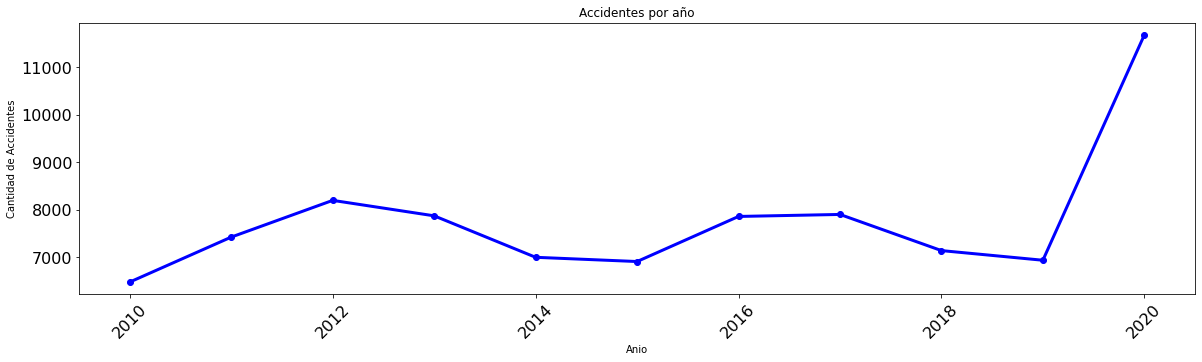





Mes de mayor accidentalidad en toda la historia NombreMes



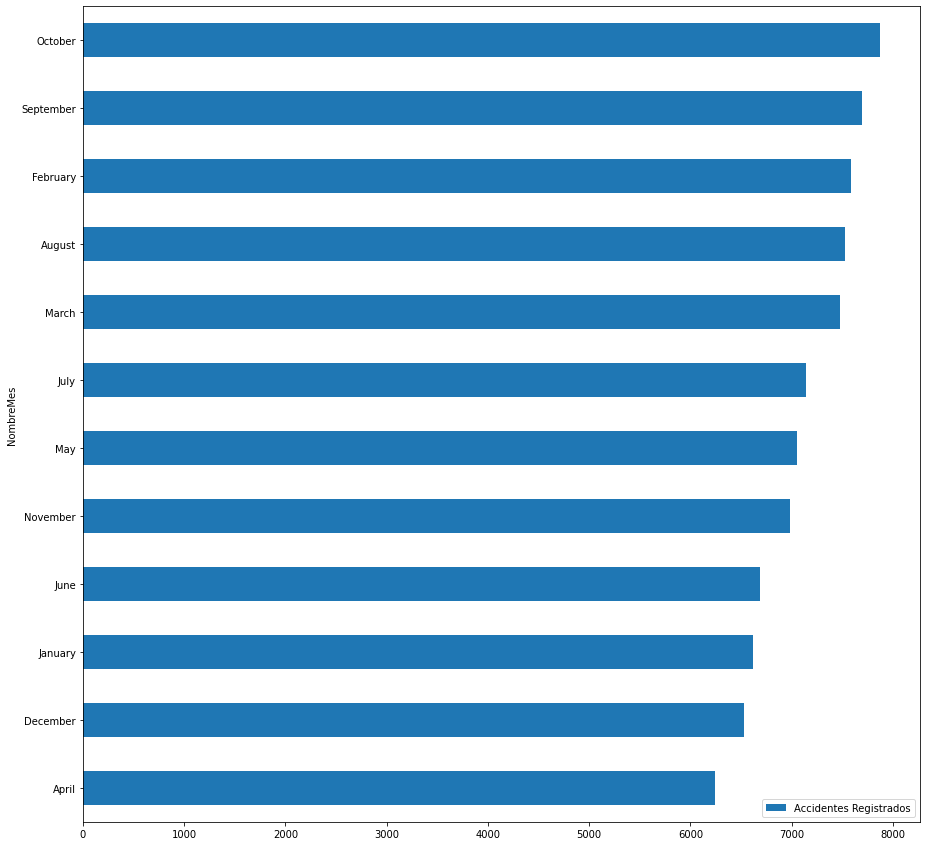





Dia de mayor accidentalidad en toda la historia Dia



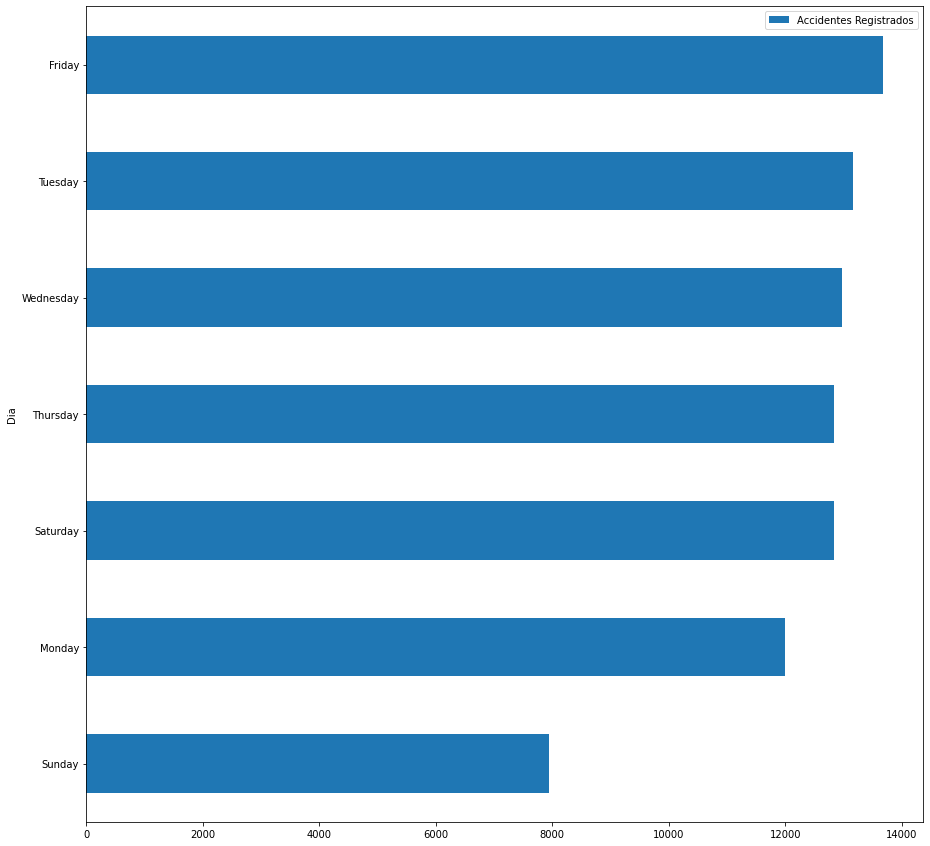





Accidentes por clase de vehiculo CLASE_VEHICULO



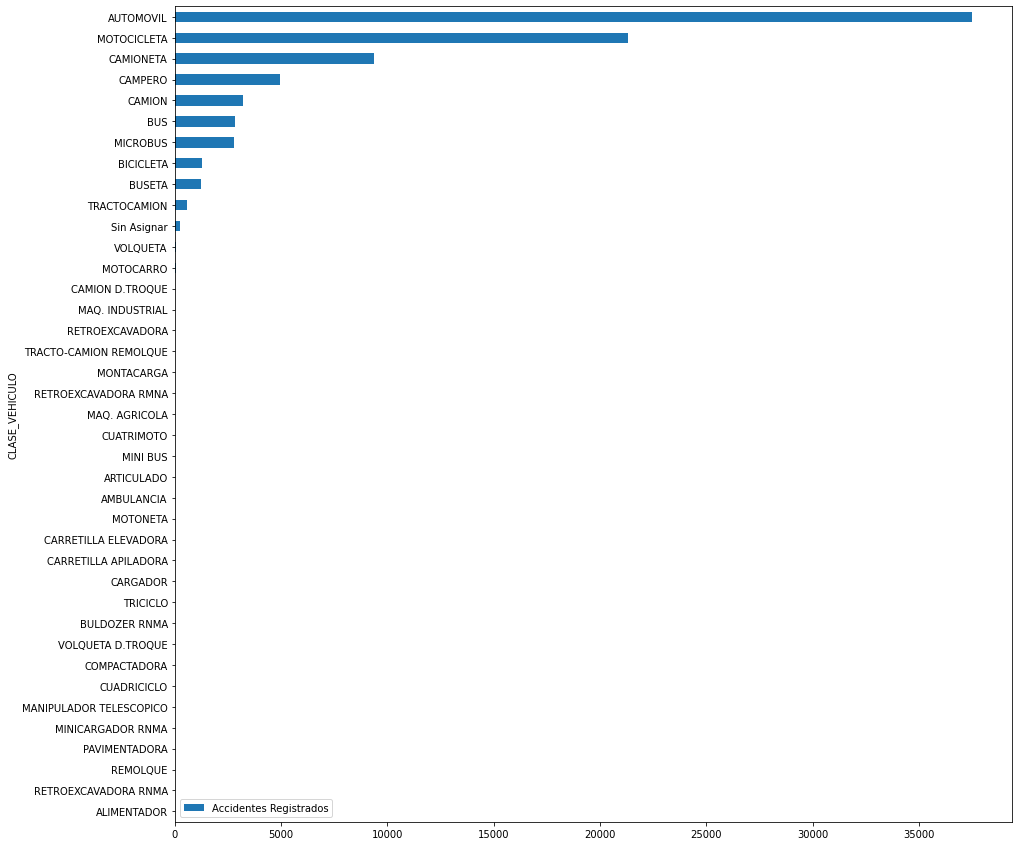





Accidentes por tipo de servicio TIPO_SERVICIO



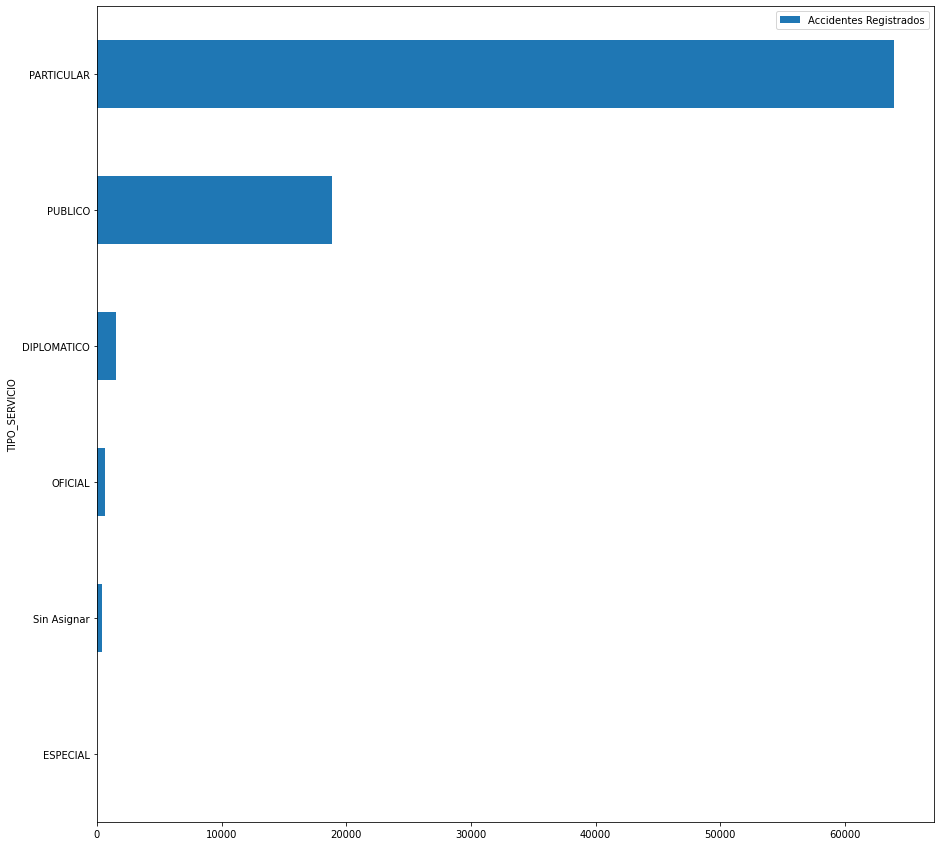





Accidentes por localidad o comuna LOCALIDAD_O_COMUNA



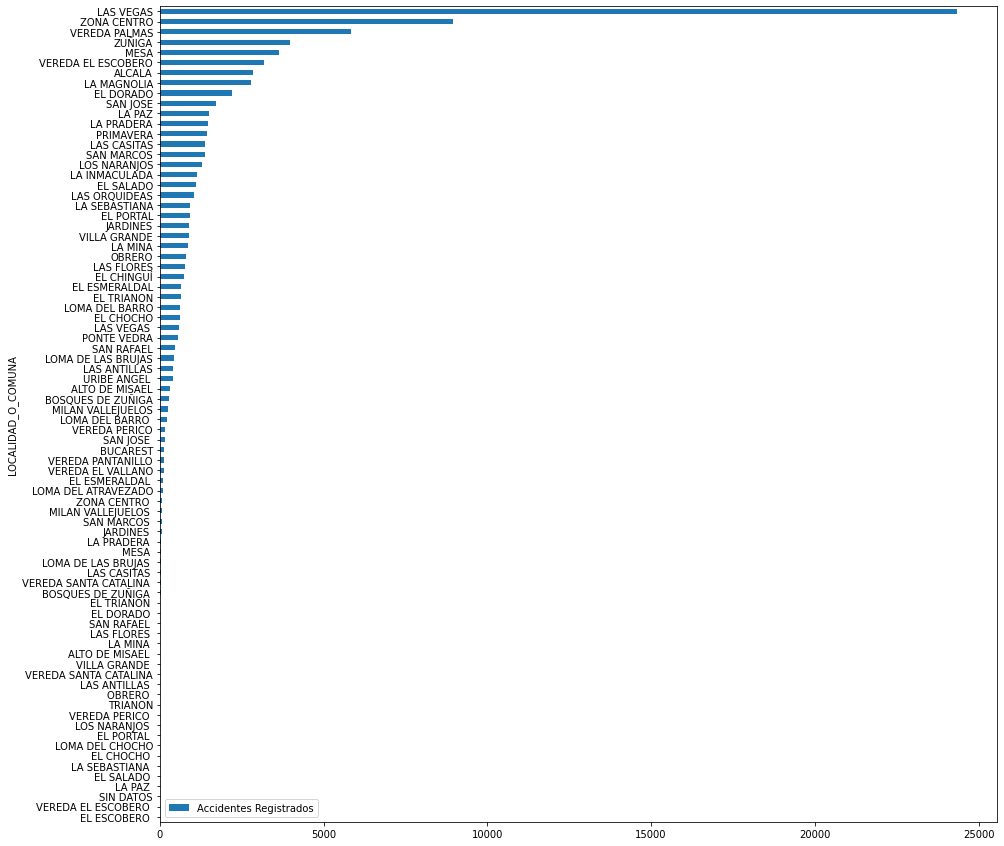

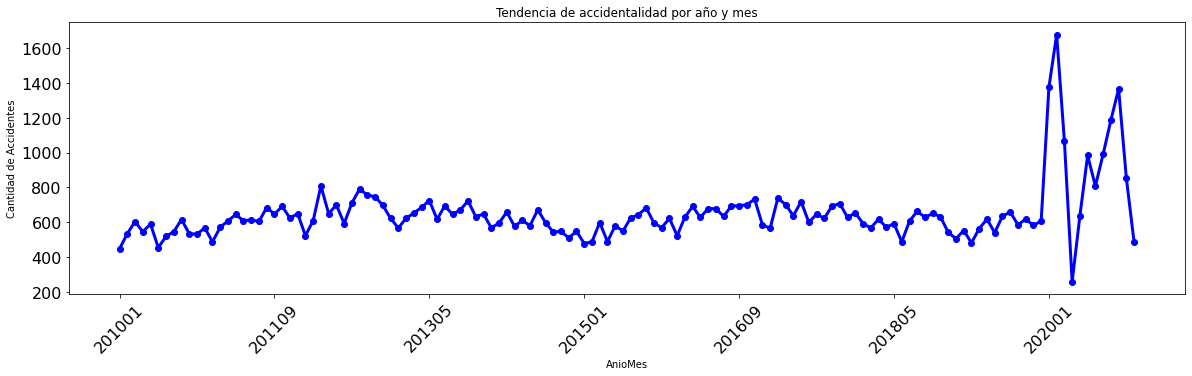





Accidentes por clase DESC_CLASE_ACCIDENTE



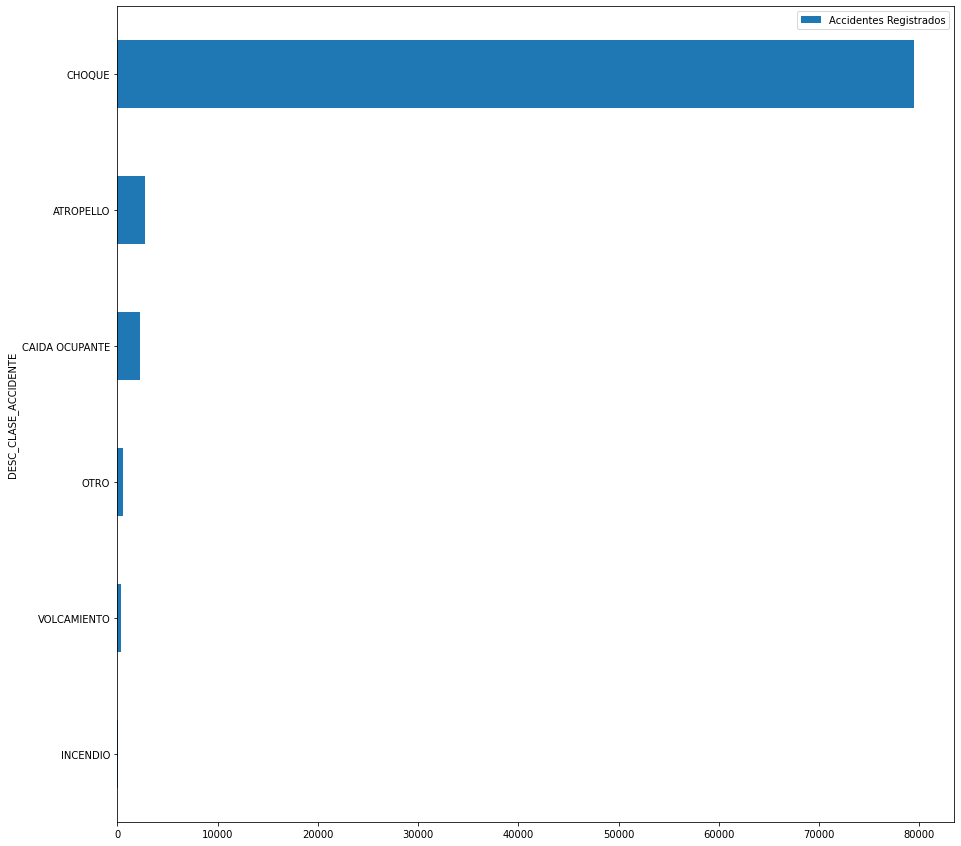





Obstaculos DESC_CHOQUE_ACCIDENTE



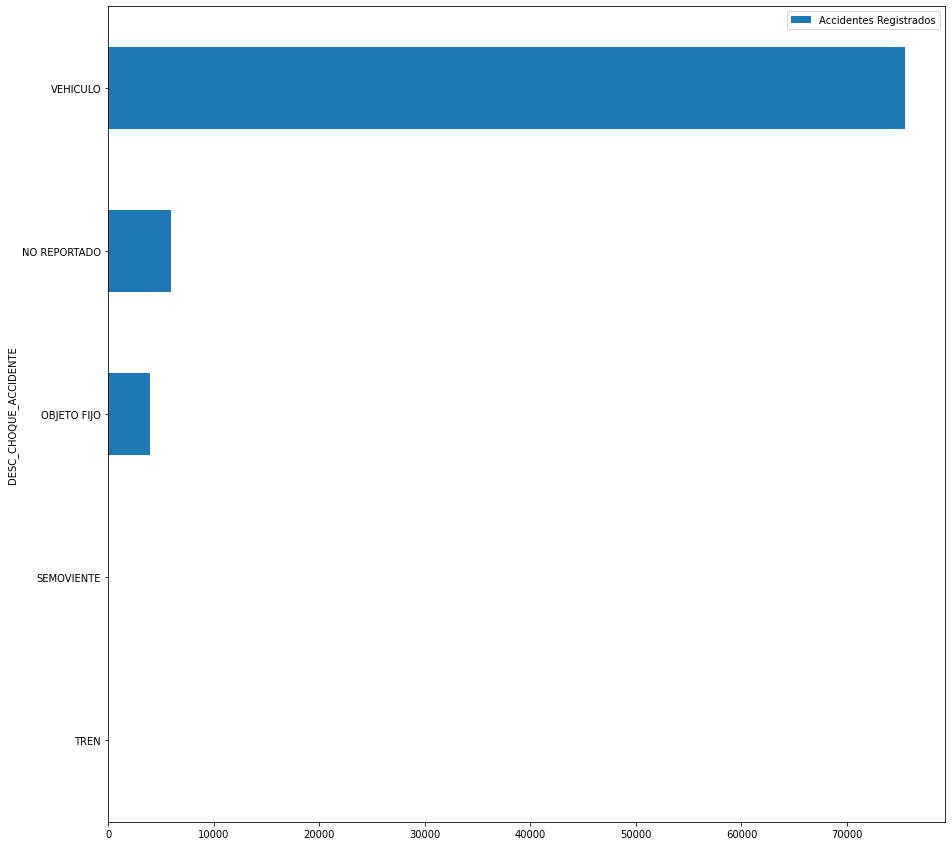





Accidentes por tipos de zona DESC_AREA_ACCIDENTE



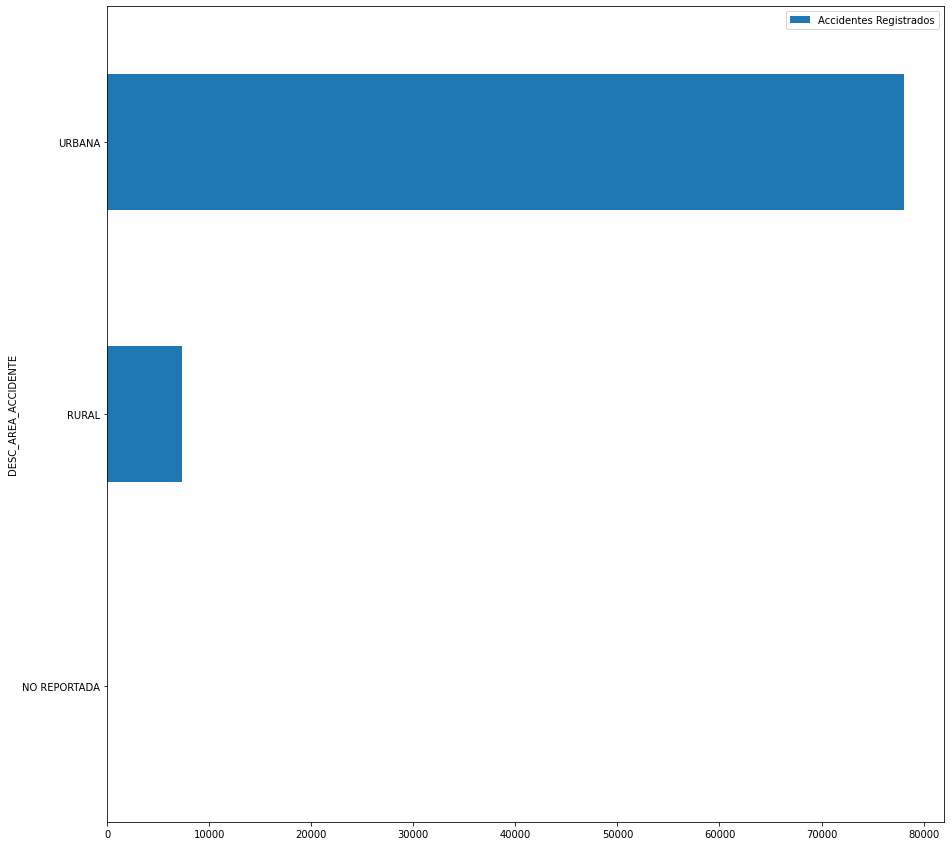





Accidentes por tipo de sector DESC_SECTOR_ACCIDENTE



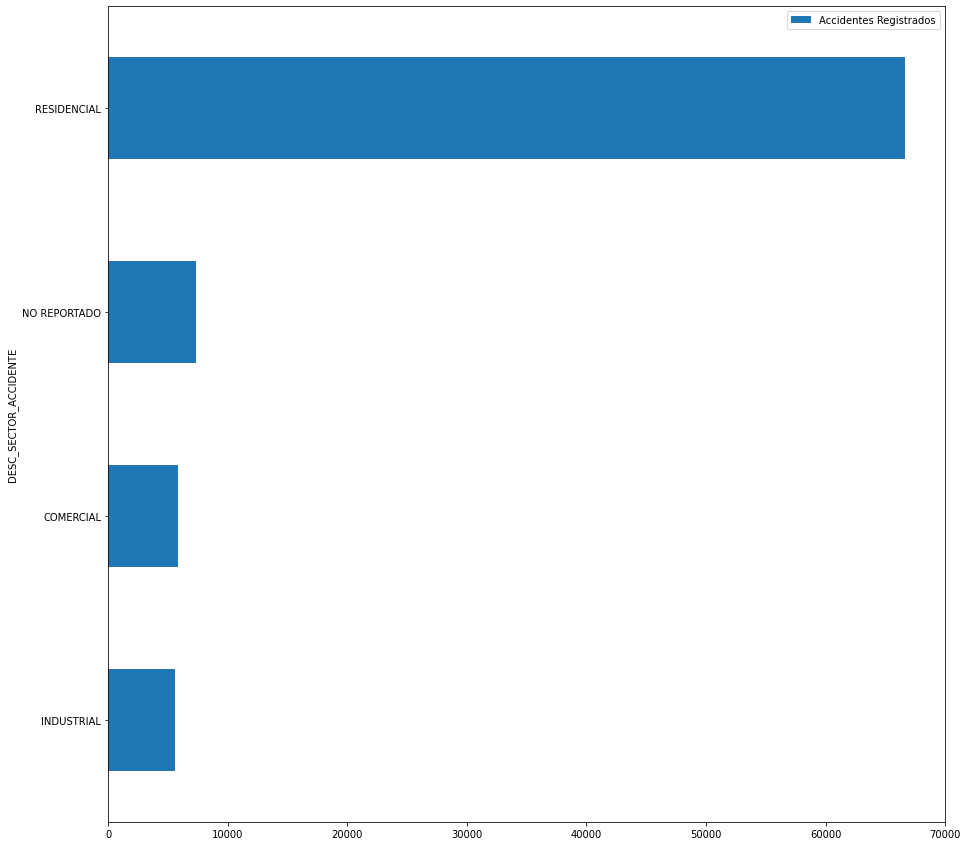





Accidentes por condicion climatica CONDICION_CLIMATICA



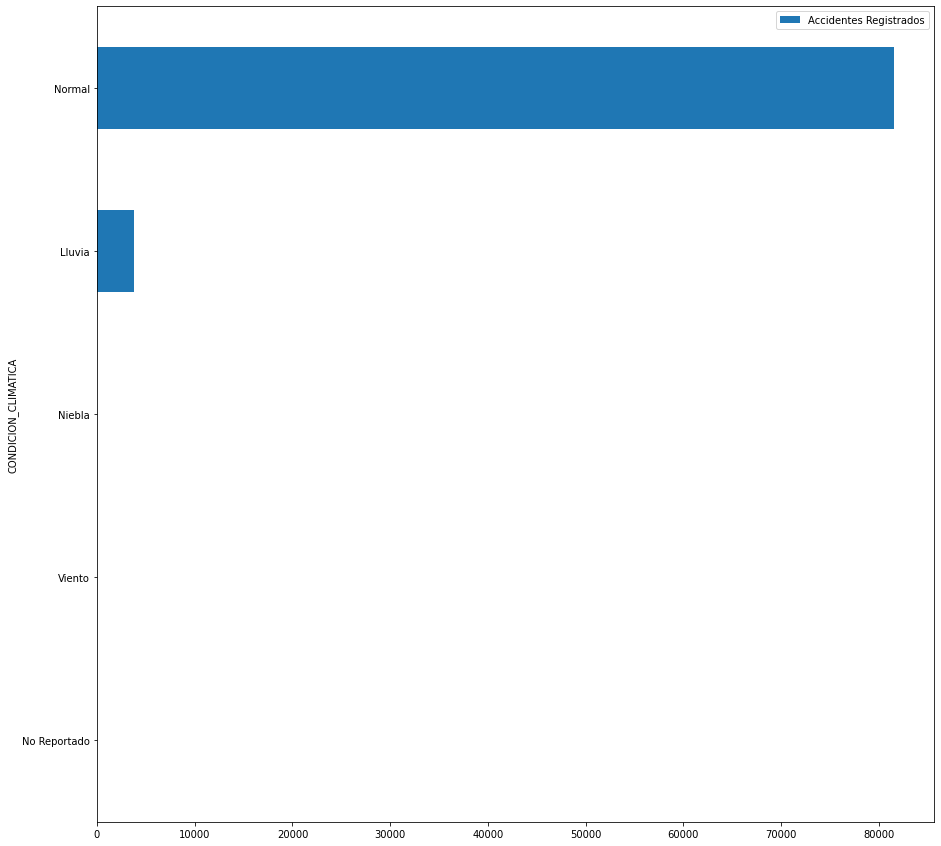





Accidentes por estado de la calle ESTADO_CALLE



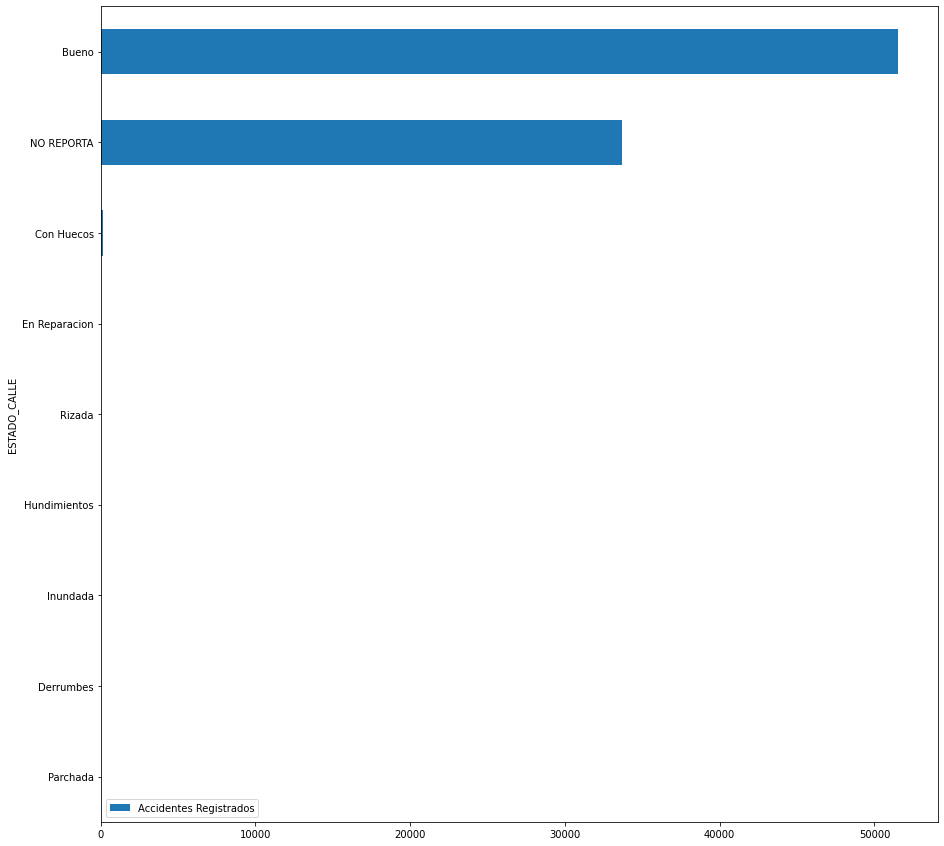





Accidentes por estado de la carrera ESTADO_CARRERA



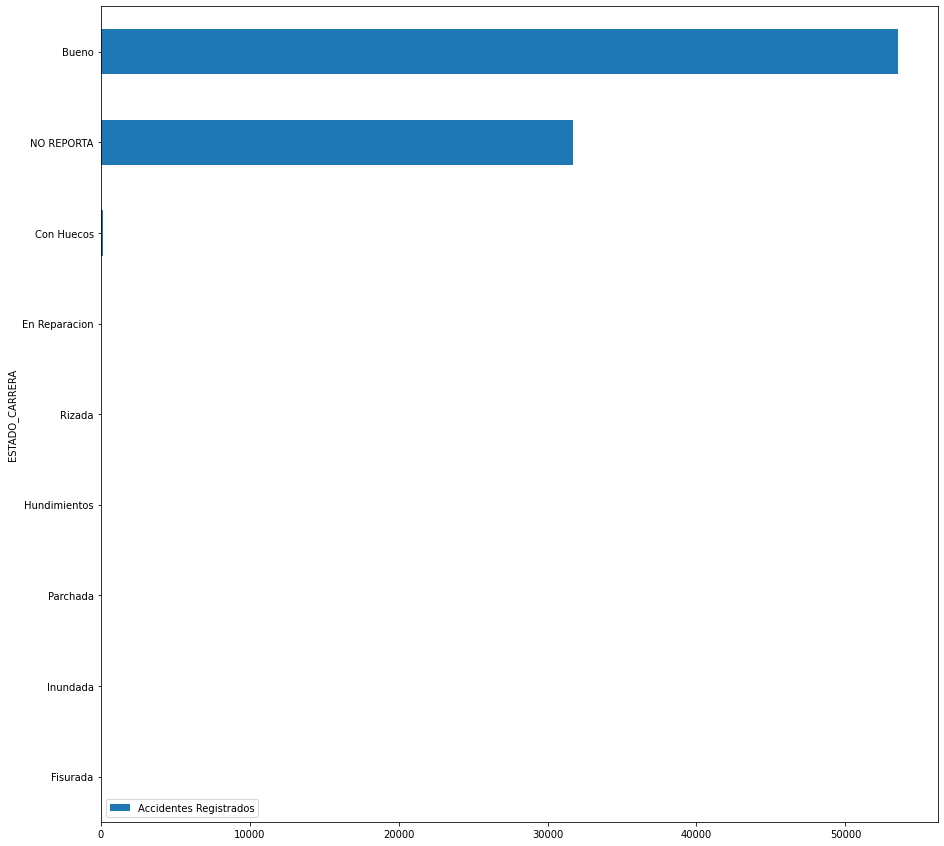





Accidentes por causa  CAUSA_ACCIDENTE



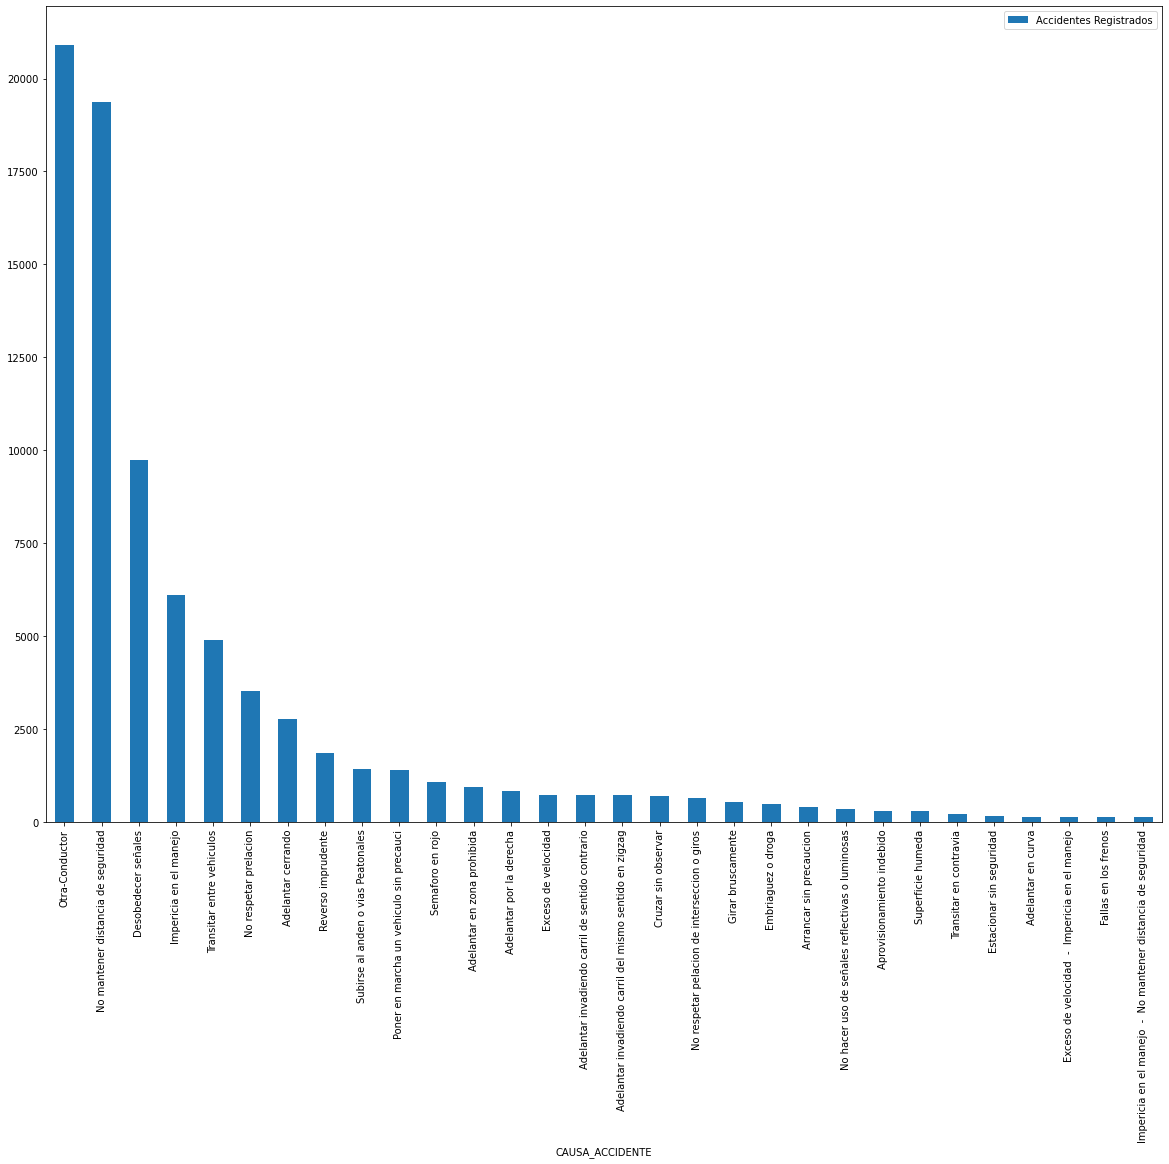





Estado de los accidentes ESTADO_ACCIDENTE



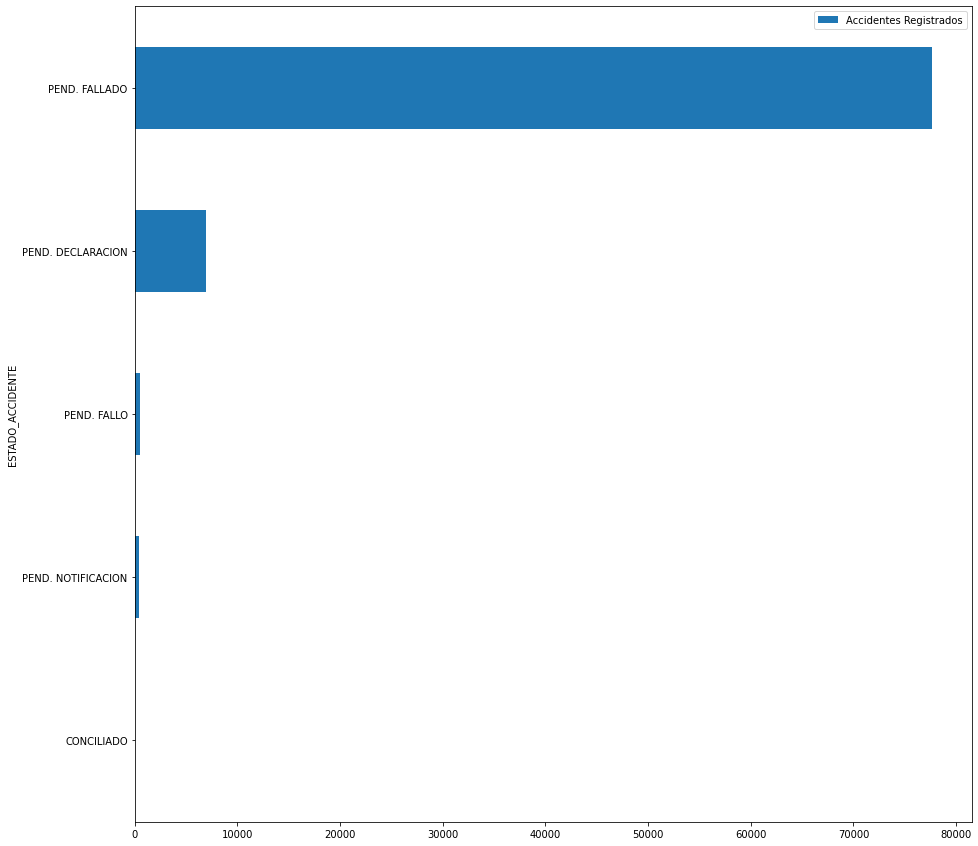





Total registros: 85422


,DESC_CLASIFICACION,Registro,Porcent
0,Con croquis,84458,98.871485
1,Denuncia,964,1.128515


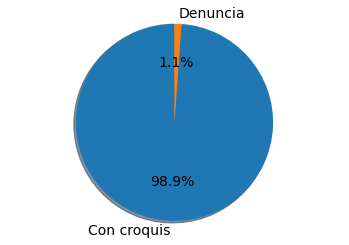





Top 10 de guardas con mayor registro de accidentes REGISTRA_ACCIDENTE



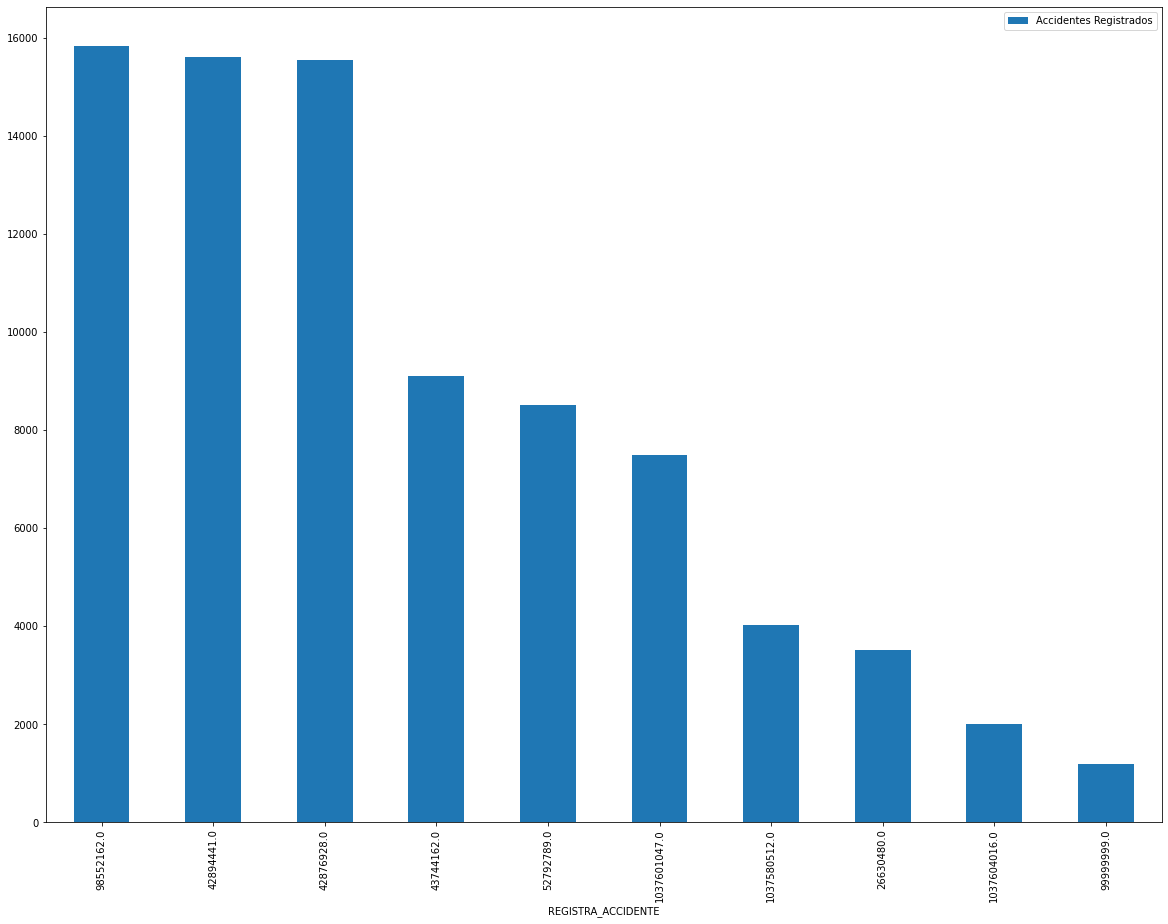





Top 100 de placa de vehiculo que mas accidentes registra NUMERO_PLACA



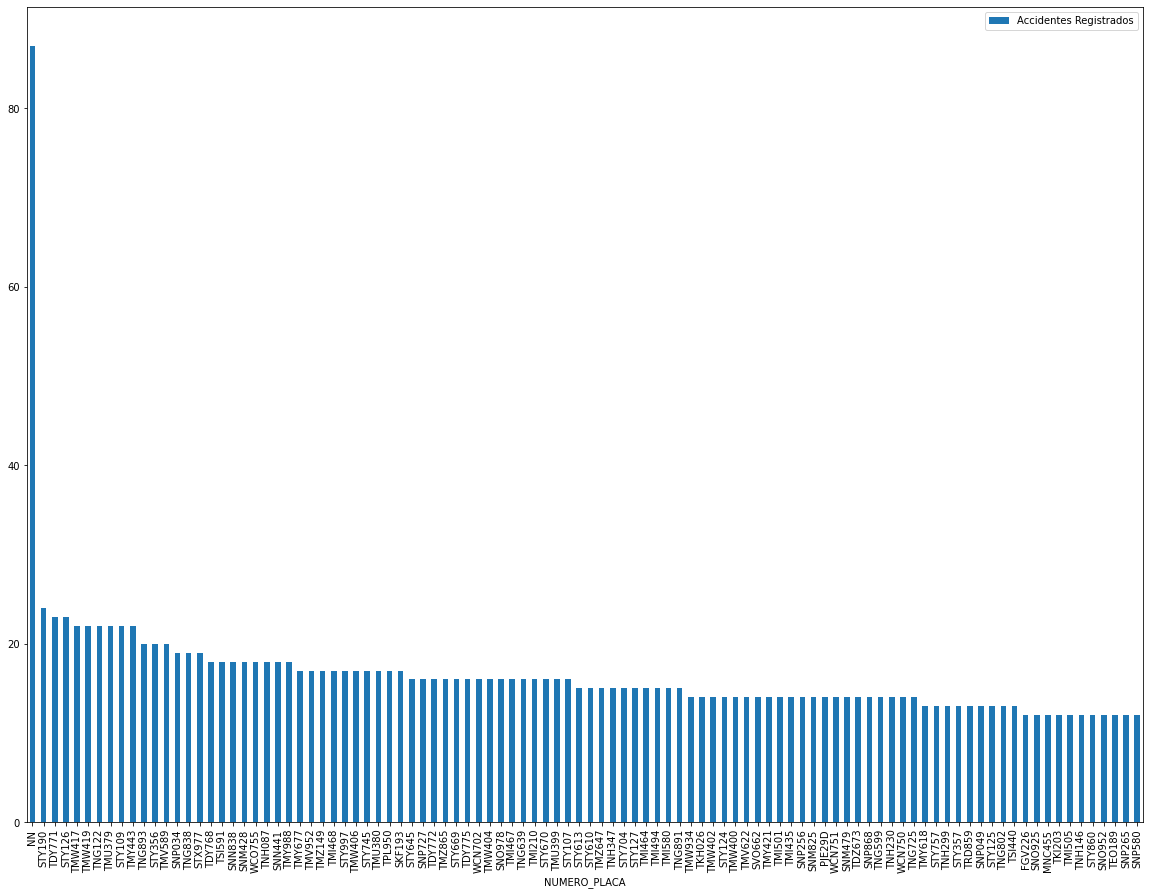





Top 20 de cedula que mas accidentes registra CEDULA_DE_LOS_INVOLUCRADOS



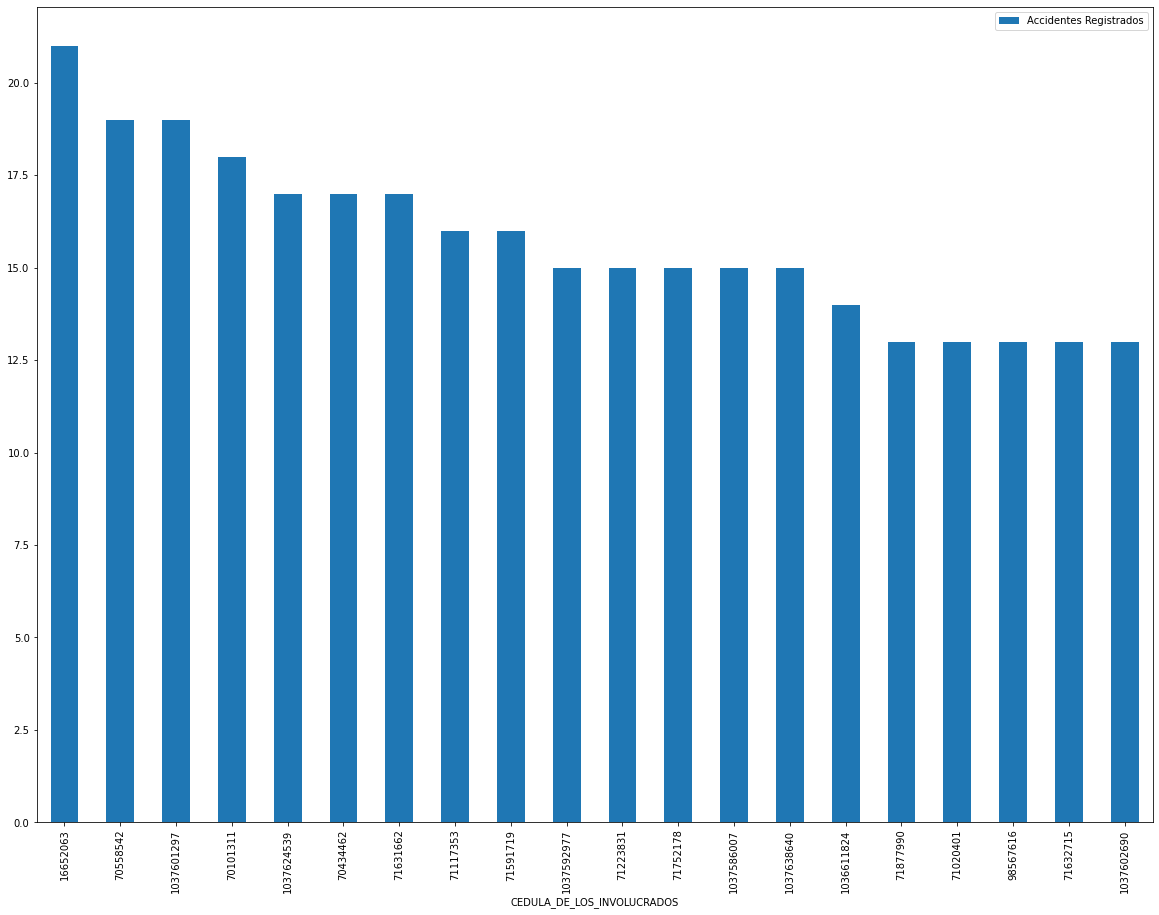

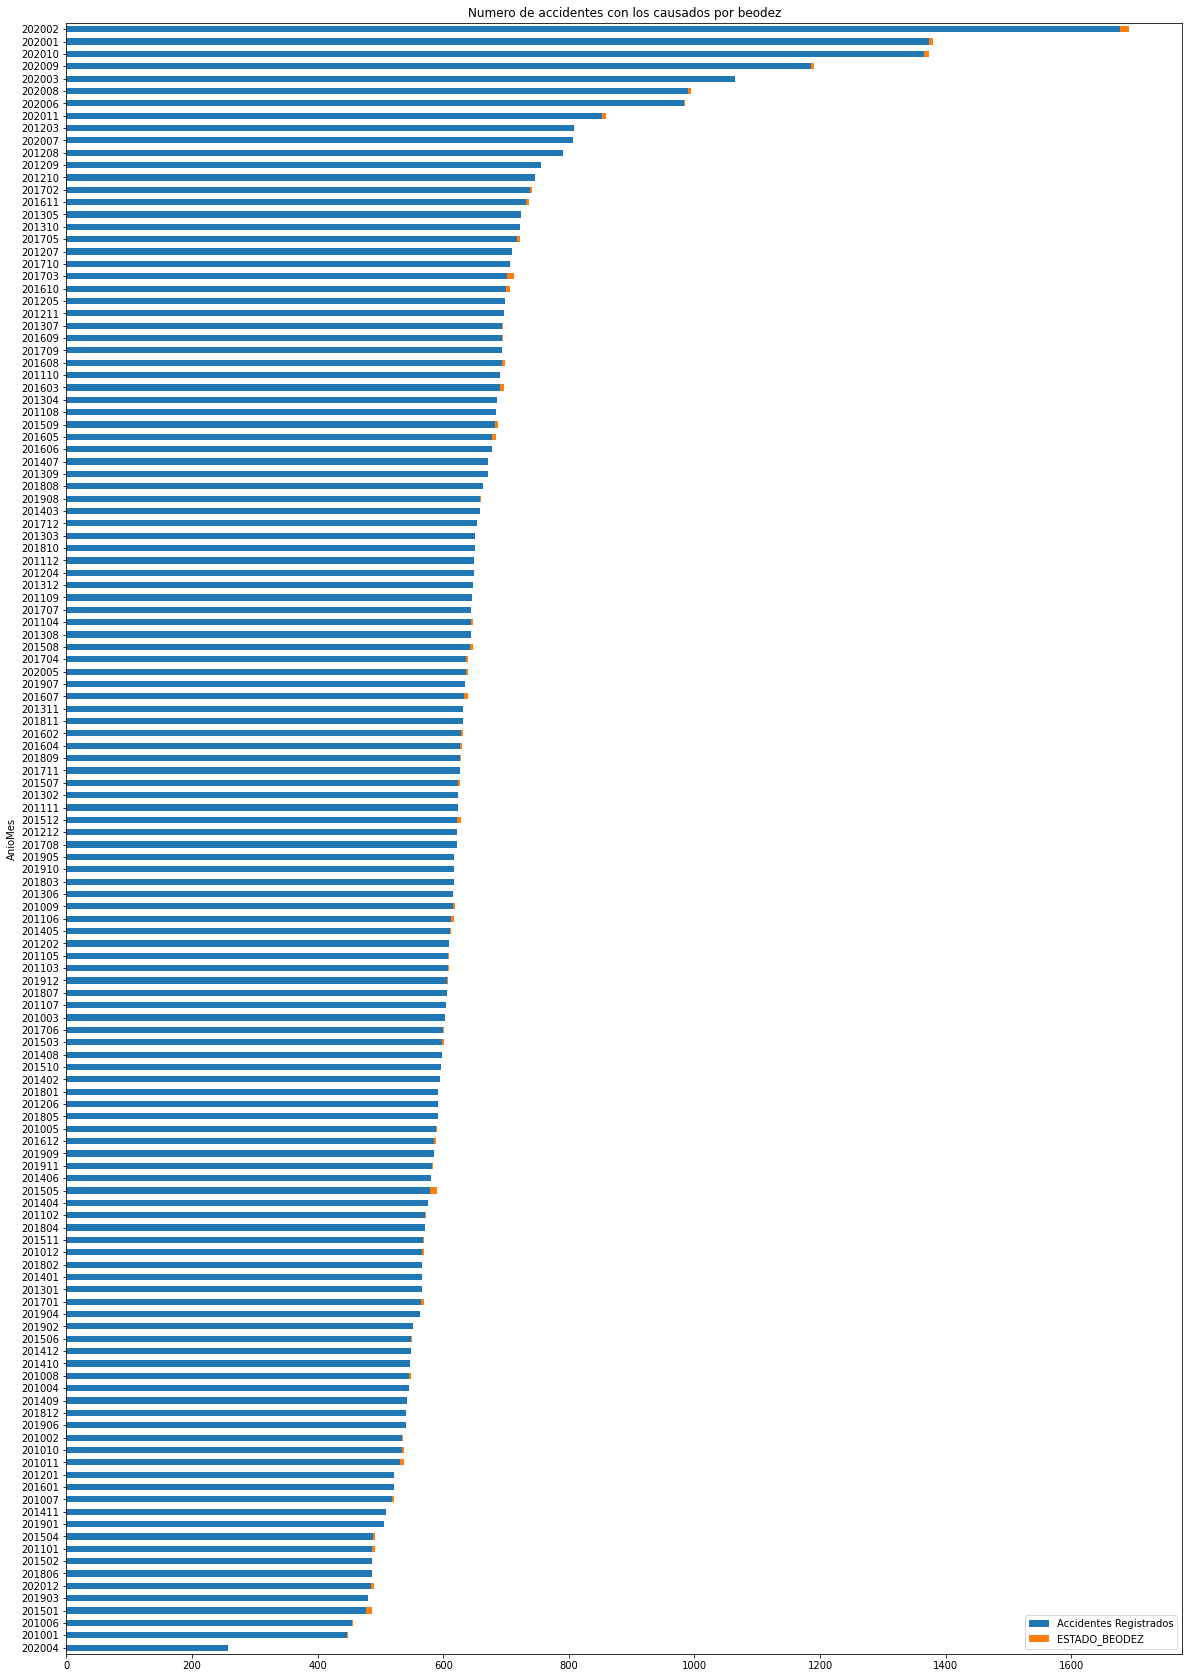

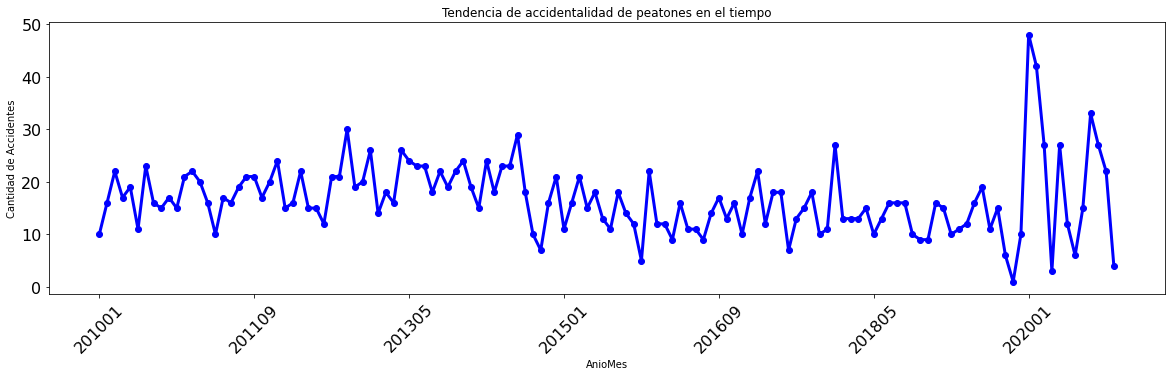

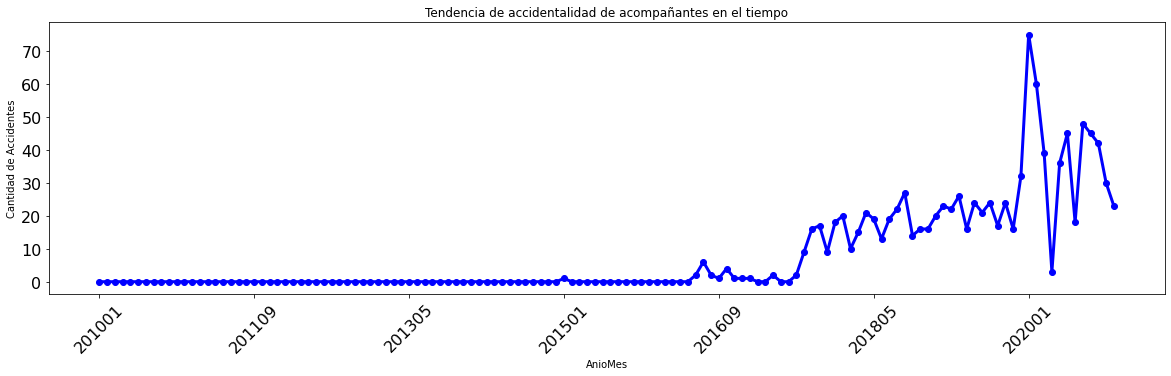

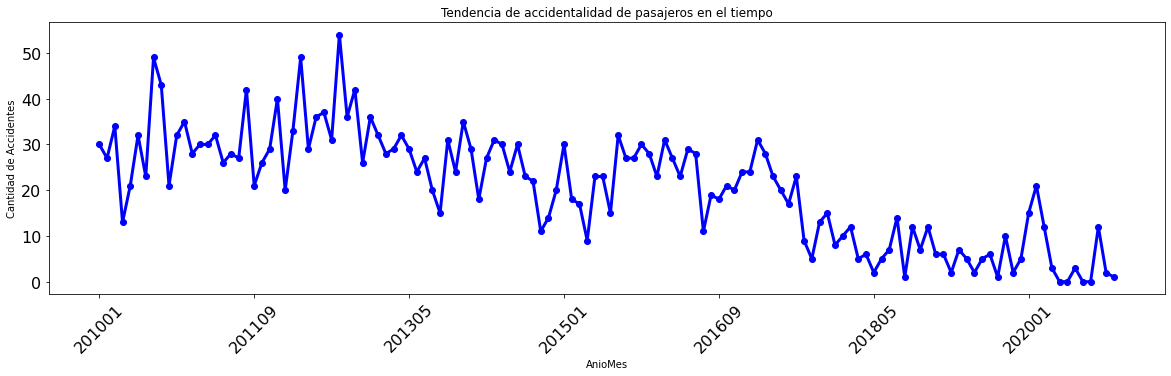

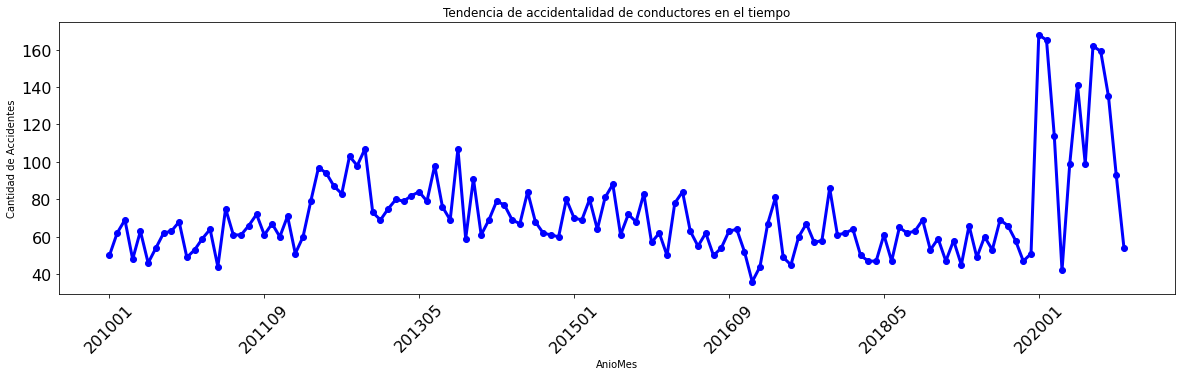

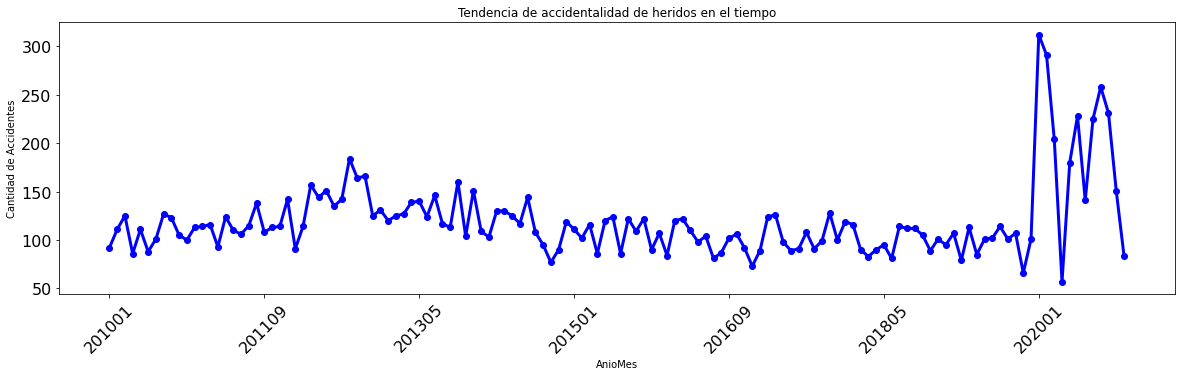

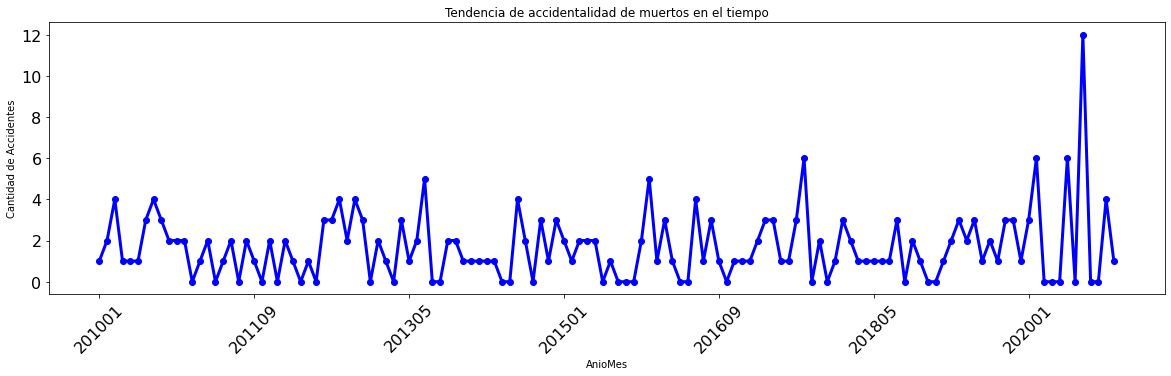





Total registros: 15956


,Rango_edad_Des,Registro,Porcent
0,Menores,1367,8.567310
1,Jovenes,4416,27.676109
2,Adultos,4538,28.440712
3,Mayores,2281,14.295563
4,Adultos Mayores,2179,13.656305
5,Ancianos,1175,7.364001


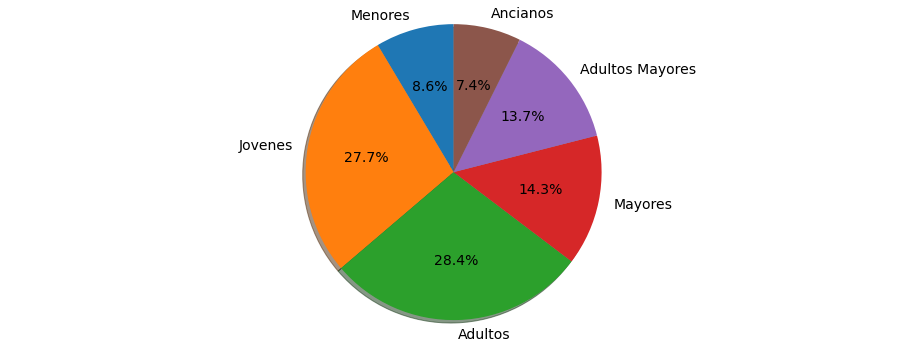





Total registros: 84127


,Rango_Horas,Registro,Porcent
0,Madrugada,2654,3.154754
1,Pico Mañana,13417,15.948506
2,Mañana,13119,15.594280
3,Hora Almuerzo,17560,20.873204
4,Tarde,12985,15.434997
5,Pico Tarde,15384,18.286638
6,Noche,7941,9.439300
7,Tarde Noche,1067,1.268321


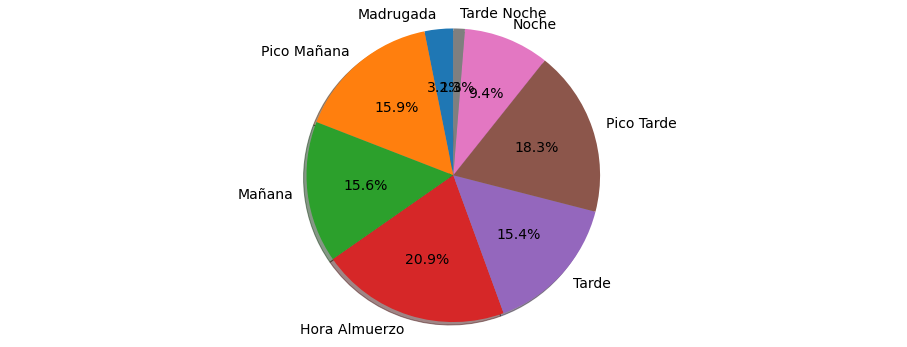





Total registros: 84687


,Rango_Horas2,Registro,Porcent
0,0-3,1519,1.793664
1,3-6,5754,6.794431
2,6-9,13252,15.648210
3,9-12,14817,17.496192
4,12-15,18396,21.722342
5,15-18,17651,20.842632
6,18-21,10249,12.102212
7,21-24,3049,3.600316


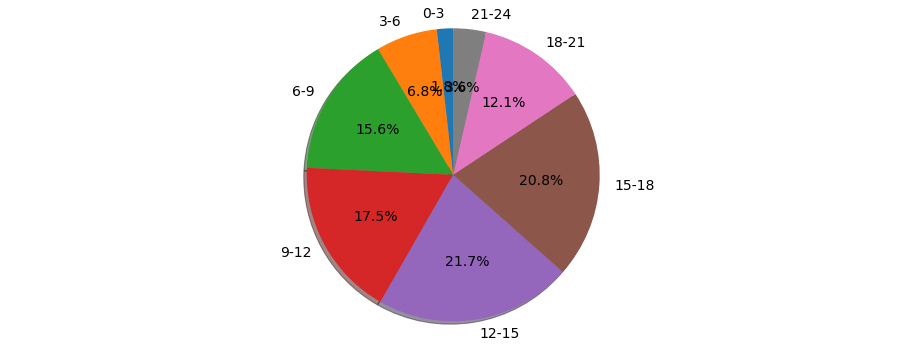





Total registros: 210.0


,Rango_Horas2,NRO_VICTIMA_MUERTO,Porcent
0,0-3,9.0,4.285714
1,3-6,22.0,10.476190
2,6-9,33.0,15.714286
3,9-12,26.0,12.380952
4,12-15,25.0,11.904762
5,15-18,40.0,19.047619
6,18-21,40.0,19.047619
7,21-24,15.0,7.142857


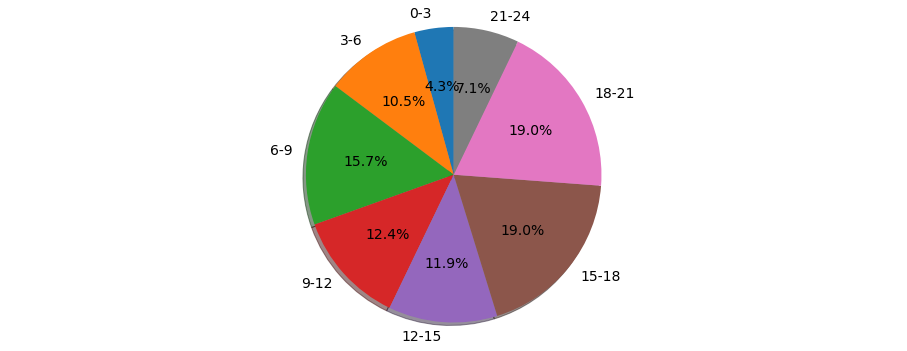

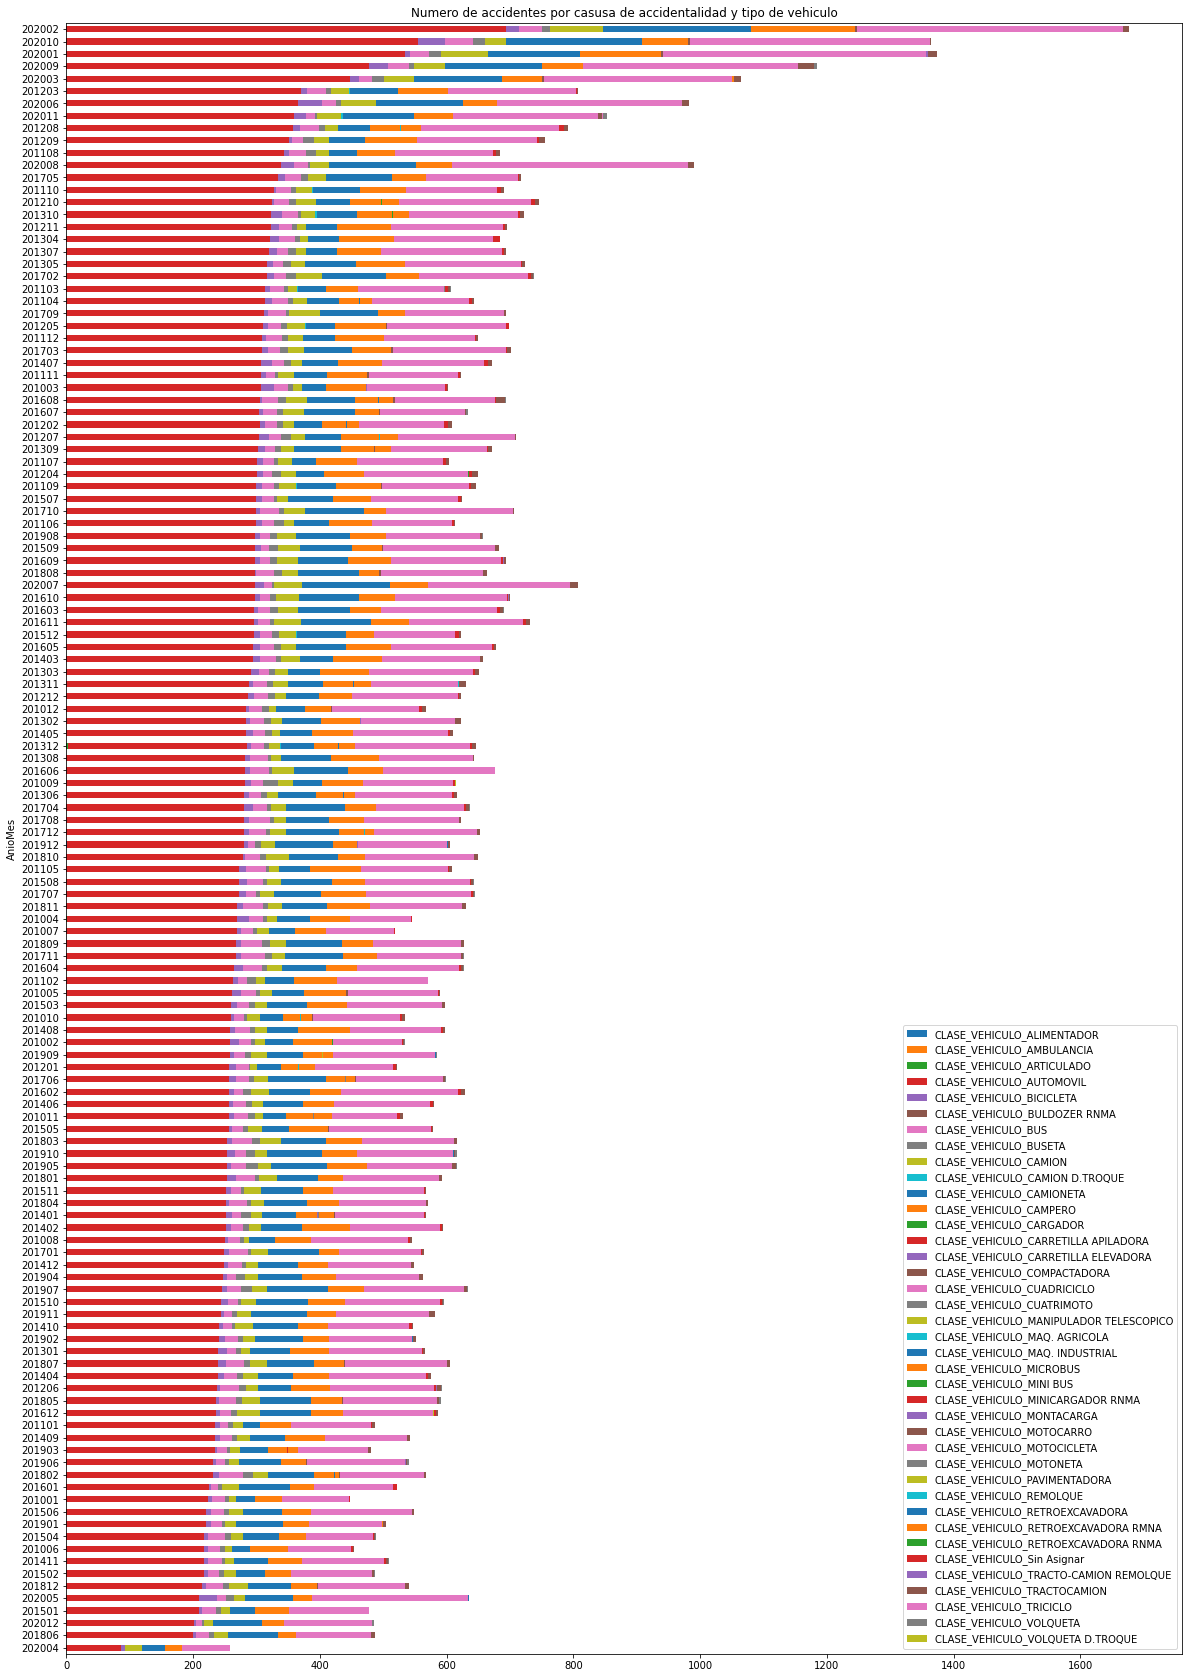

In [17]:
# analisis por zona - clase de vehiculo 

# grafica de accidentes por año
Col=['Anio','Registro']
grafica_general('Anio','Line',Col,'Accidentes por año',0)

# Grafica por mes en toda la historia
grafica_general('NombreMes','Barras','NRO_RADICADO','Mes de mayor accidentalidad en toda la historia',0)

# Grafica por dia en toda la historia
grafica_general('Dia','Barras','Registro','Dia de mayor accidentalidad en toda la historia',0)


# Grafica de accidentes por clase de vehiculo
grafica_general('CLASE_VEHICULO','Barras','NRO_RADICADO','Accidentes por clase de vehiculo',0)

# Grafica de accidentes por tipo de servicio
grafica_general('TIPO_SERVICIO','Barras','NRO_RADICADO','Accidentes por tipo de servicio',0)

# Grafica de accidentes por localidad o cimuna
grafica_general('LOCALIDAD_O_COMUNA','Barras','NRO_RADICADO','Accidentes por localidad o comuna',0)

# Grafica de accidentes por Año y mes
Col=['Anio','Mes','MesStr','NombreMes','AnioMes','Registro']
grafica_general('AnioMes','Line',Col,'Tendencia de accidentalidad por año y mes',0)

# Grafica de accidentes Clase de Accidente
grafica_general('DESC_CLASE_ACCIDENTE','Barras','NRO_RADICADO','Accidentes por clase',0)

# Grafica de accidentes contra obstaculos
grafica_general('DESC_CHOQUE_ACCIDENTE','Barras','NRO_RADICADO','Obstaculos',0)

# Grafica de accidentes por tipo de zona
grafica_general('DESC_AREA_ACCIDENTE','Barras','NRO_RADICADO','Accidentes por tipos de zona',0)

# Grafica de accidentes por tipo de sector
grafica_general('DESC_SECTOR_ACCIDENTE','Barras','NRO_RADICADO','Accidentes por tipo de sector',0)

# Grafica de accidentes por tipo condicion climatica
grafica_general('CONDICION_CLIMATICA','Barras','NRO_RADICADO','Accidentes por condicion climatica',0)

# Grafica de accidentes por estado de la calle
grafica_general('ESTADO_CALLE','Barras','NRO_RADICADO','Accidentes por estado de la calle',0)

# Grafica de accidentes por estado de la carrera
grafica_general('ESTADO_CARRERA','Barras','NRO_RADICADO','Accidentes por estado de la carrera',0)

# Grafica de accidentes por causa del accidente
grafica_general('CAUSA_ACCIDENTE','BarrasTop20','Registro','Accidentes por causa ',30)

# Grafica de accidentes por estado del accidente
grafica_general('ESTADO_ACCIDENTE','Barras','Registro','Estado de los accidentes',0)

# Grafica de accidentes por estado del accidente
grafica_general('DESC_CLASIFICACION','Pie','Registro','Clasificacion de los accidentes',0)

# Grafica top 10 de guardas de transito con mas registros
grafica_general('REGISTRA_ACCIDENTE','BarrasTop20','Registro','Top 10 de guardas con mayor registro de accidentes',10)


# Grafica top 10 de placa de vehiculo que mas accidentes registra
grafica_general('NUMERO_PLACA','BarrasTop20','Registro','Top 100 de placa de vehiculo que mas accidentes registra',100)

# Grafica top 20 de cedula que mas accidentes registra
grafica_general('CEDULA_DE_LOS_INVOLUCRADOS','BarrasFiltradoCedula','Registro','Top 20 de cedula que mas accidentes registra',20)

# Grafica de numero de accidentes con los causados por beodez
Col = ['AnioMes','Registro','ESTADO_BEODEZ']
grafica_general('AnioMes','BarrasStacked',Col,'Numero de accidentes con los causados por beodez',0)

# Grafica de tendencia de accidentalidad de peatones en el tiempo
Col = ['AnioMes','NRO_VICTIMA_Peaton']
grafica_general('AnioMes','LineTendenciaUniVariable',Col,'Tendencia de accidentalidad de peatones en el tiempo',0)

# Grafica de tendencia de accidentalidad de Acompañantes en el tiempo
Col = ['AnioMes','NRO_VICTIMA_ACOMPANANTE']
grafica_general('AnioMes','LineTendenciaUniVariable',Col,'Tendencia de accidentalidad de acompañantes en el tiempo',0)

# Grafica de tendencia de accidentalidad de pasajeros en el tiempo
Col = ['AnioMes','NRO_VICTIMA_PASAJERO']
grafica_general('AnioMes','LineTendenciaUniVariable',Col,'Tendencia de accidentalidad de pasajeros en el tiempo',0)

# Grafica de tendencia de accidentalidad de consuctores en el tiempo
Col = ['AnioMes','NRO_VICTIMA_CONDUCTOR']
grafica_general('AnioMes','LineTendenciaUniVariable',Col,'Tendencia de accidentalidad de conductores en el tiempo',0)

# Grafica de tendencia de accidentalidad de heridos en el tiempo
Col = ['AnioMes','NRO_VICTIMA_HERIDO']
grafica_general('AnioMes','LineTendenciaUniVariable',Col,'Tendencia de accidentalidad de heridos en el tiempo',0)

# Grafica de tendencia de accidentalidad de muertos en el tiempo
Col = ['AnioMes','NRO_VICTIMA_MUERTO']
grafica_general('AnioMes','LineTendenciaUniVariable',Col,'Tendencia de accidentalidad de muertos en el tiempo',0)

# Grafica de accidentes por rango de edad
grafica_general('Rango_edad_Des','Pie','Registro','Accidentes por rango de edad',0)

# Grafica de accidentes por rango de horas (jornadas)
grafica_general('Rango_Horas','Pie','Registro','Accidentes por rango de horas en jornadas',0)

# Grafica de accidentes por rango de horas (rangos de 3 horas)
grafica_general('Rango_Horas2','Pie','Registro','Accidentes por rango de horas (3 horas)',0)

# Grafica de numero de muertes por año
grafica_general('Rango_Horas2','PieSum','NRO_VICTIMA_MUERTO','Accidentes por rango de edad',0)

# Grafica de numero de accidentes por casusa de accidentalidad y tipo de vehiculo
Col = ['AnioMes','CLASE_VEHICULO']
grafica_general('AnioMes','BarrasStackedColumnas',Col,'Numero de accidentes por casusa de accidentalidad y tipo de vehiculo',0)


# Estadisticas Detalladas

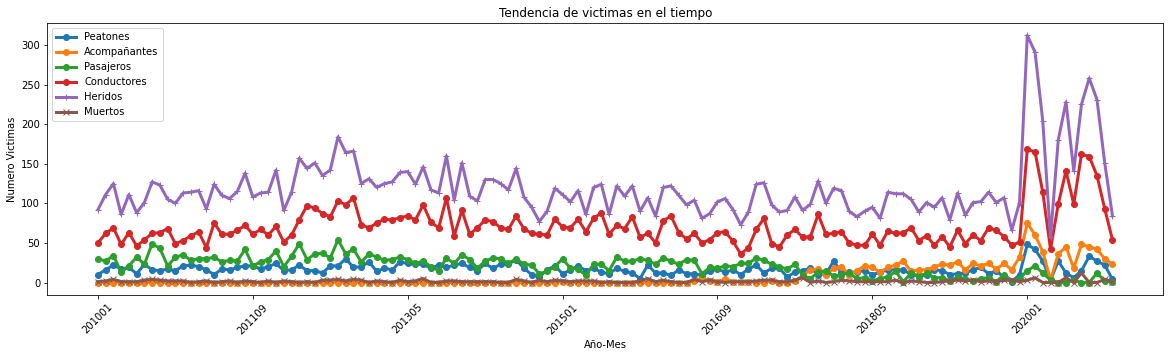

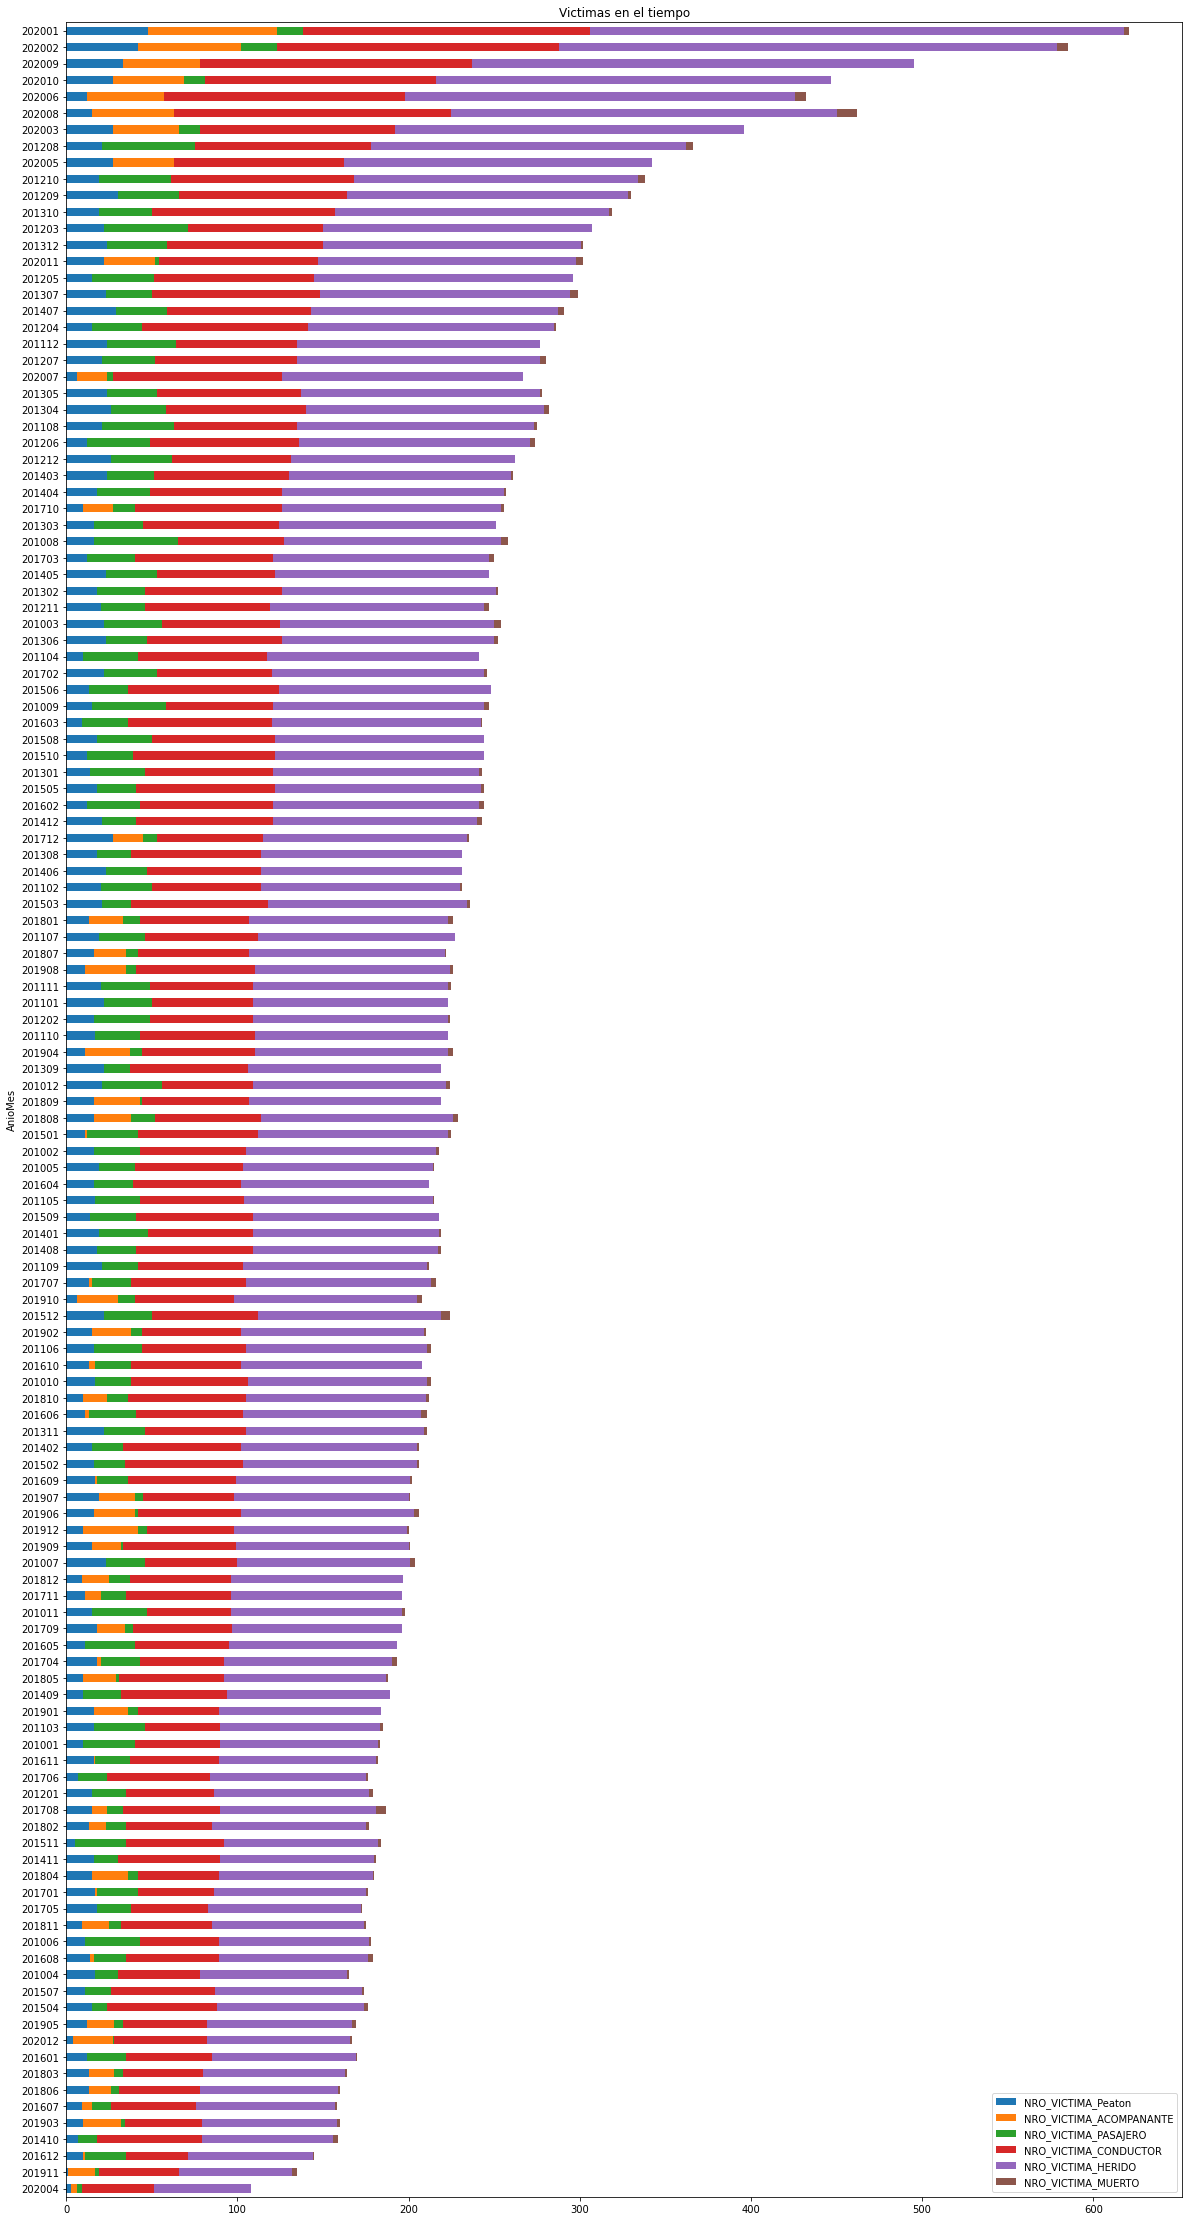

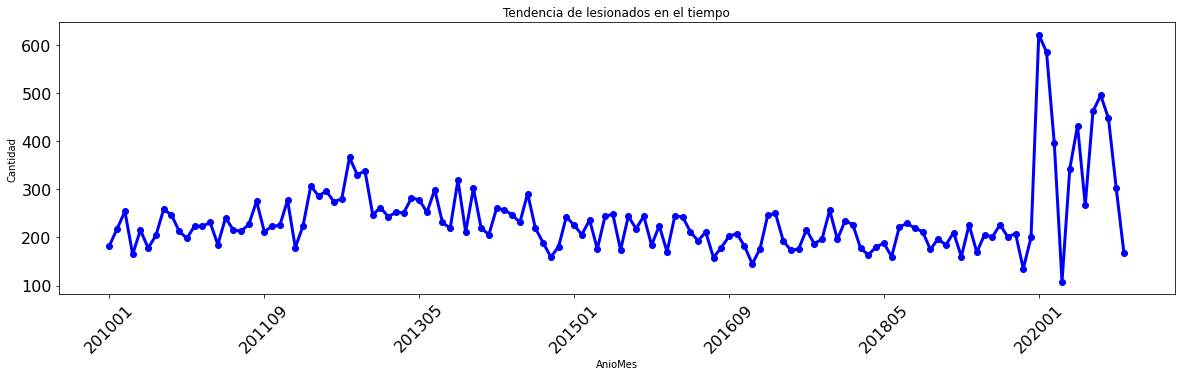

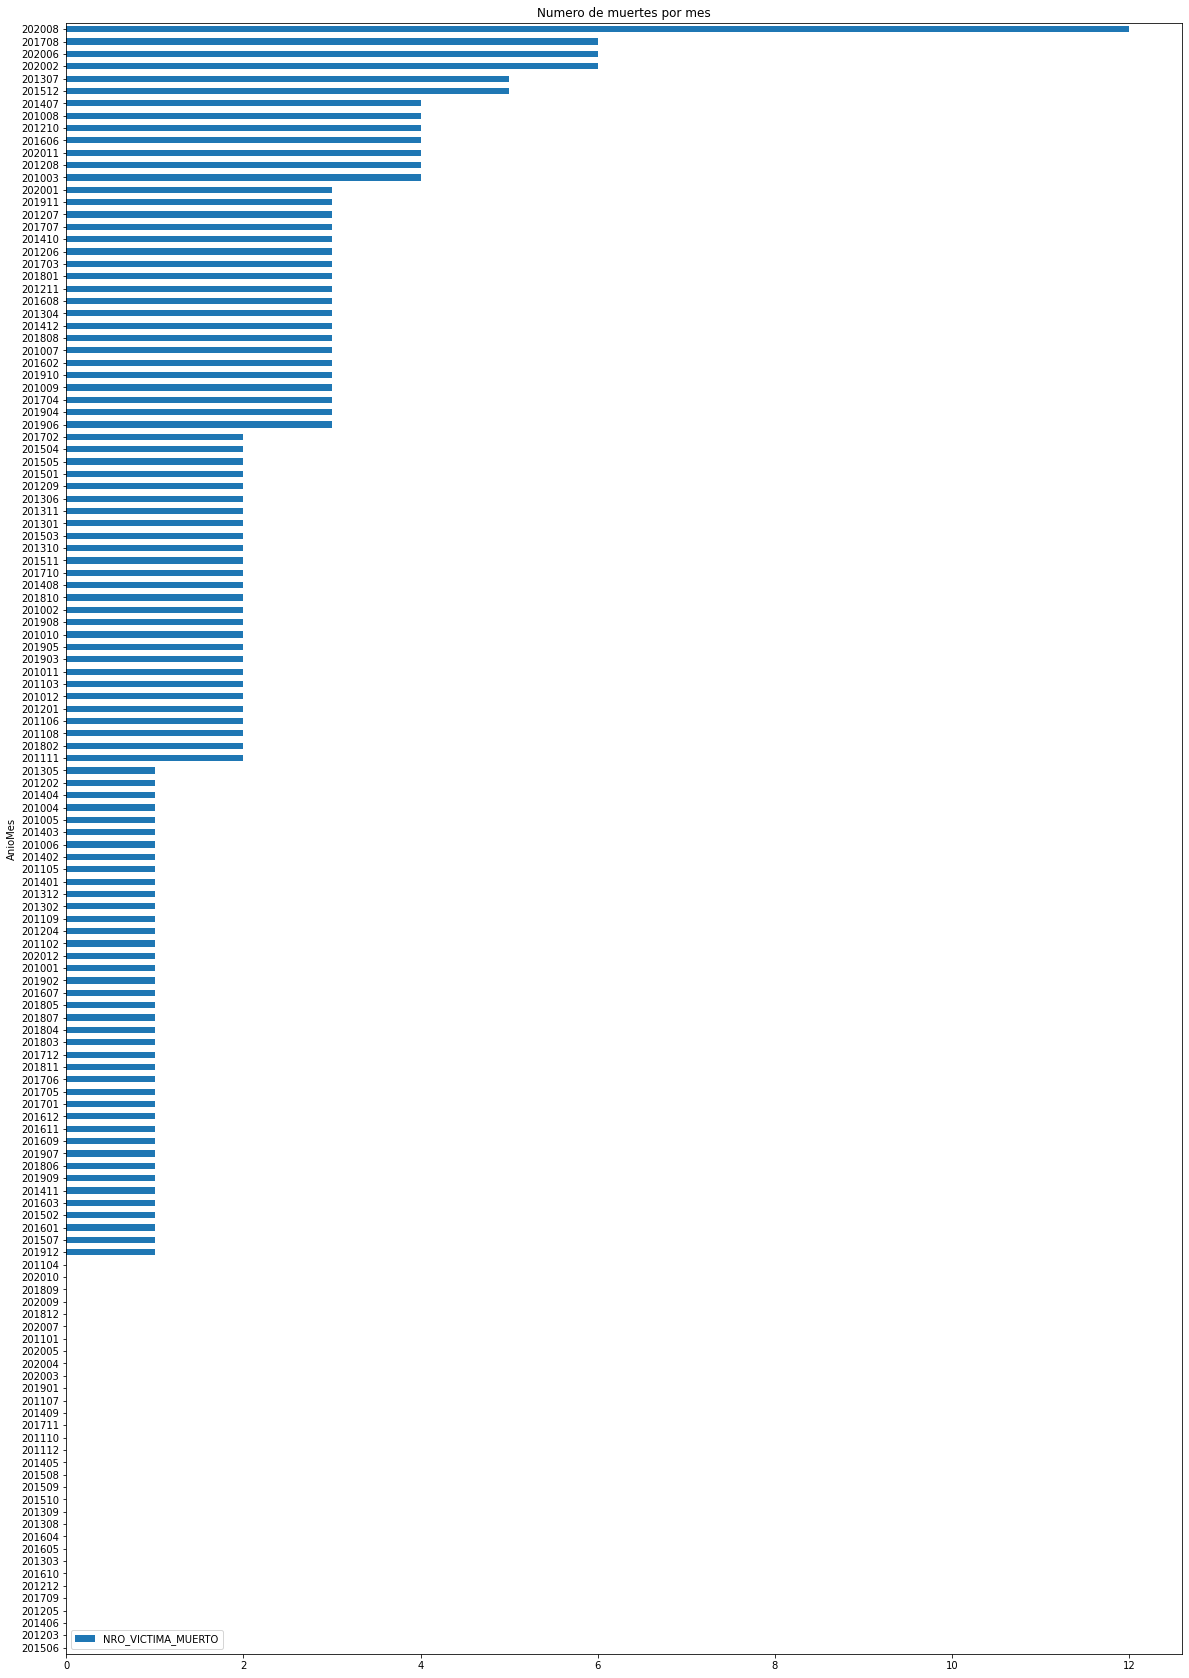

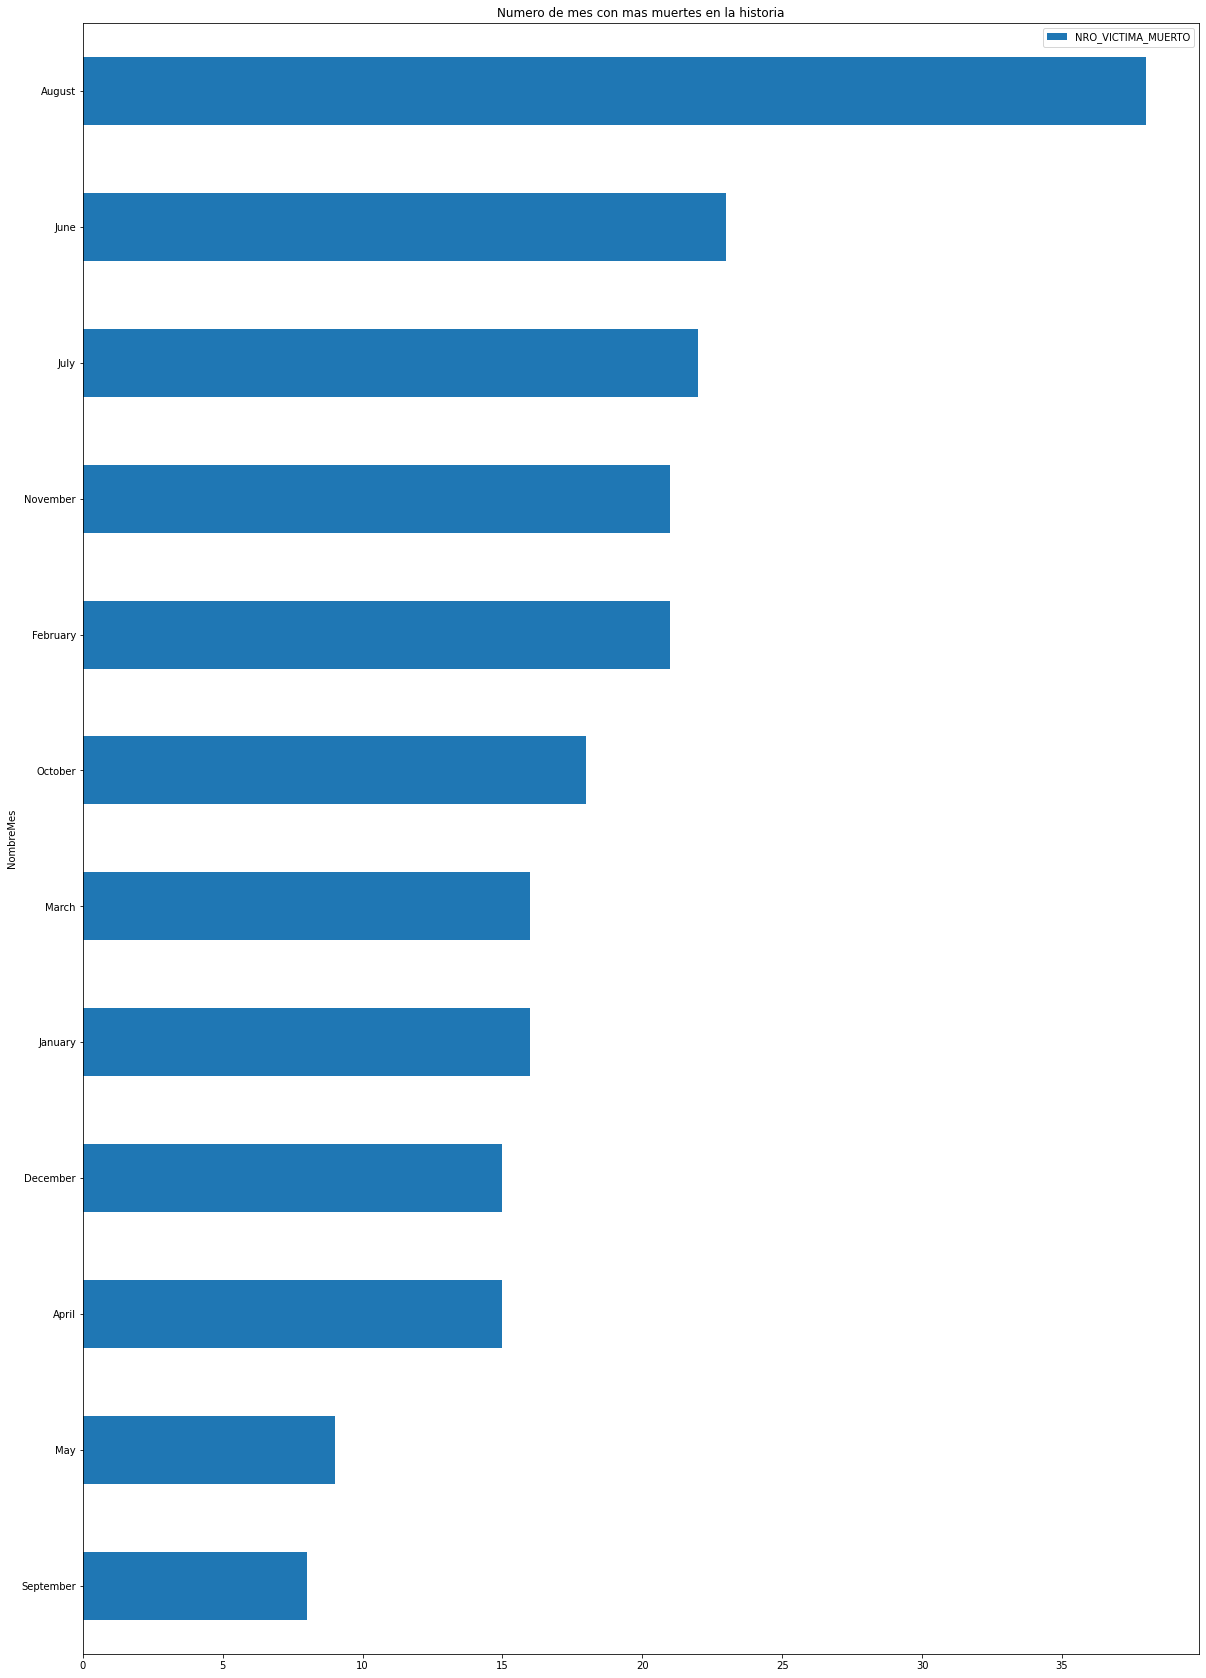





Total registros: 222.0


,Anio,NRO_VICTIMA_MUERTO,Porcent
0,2010,26.0,11.711712
1,2011,11.0,4.954955
2,2012,23.0,10.360360
3,2013,19.0,8.558559
4,2014,17.0,7.657658
5,2015,17.0,7.657658
6,2016,16.0,7.207207
7,2017,23.0,10.360360
8,2018,16.0,7.207207
9,2019,22.0,9.909910


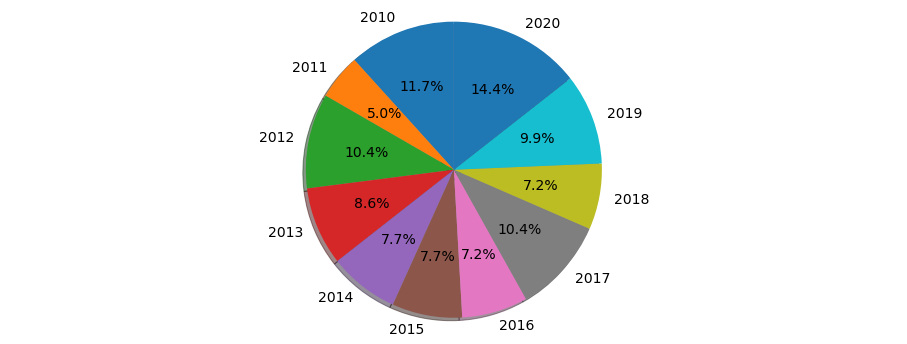

In [18]:
# grafica de Tendencia de victimas en el tiempo
Col = ['AnioMes','NRO_VICTIMA_Peaton','NRO_VICTIMA_ACOMPANANTE','NRO_VICTIMA_PASAJERO','NRO_VICTIMA_CONDUCTOR','NRO_VICTIMA_HERIDO','NRO_VICTIMA_MUERTO']
grafica_general('AnioMes','LineAnalisisAccidentes',Col,'Tendencia de victimas en el tiempo',0)

# Grafica de victimas y accidentalidad en el tiempo
Col = ['AnioMes','NRO_VICTIMA_Peaton','NRO_VICTIMA_ACOMPANANTE','NRO_VICTIMA_PASAJERO','NRO_VICTIMA_CONDUCTOR','NRO_VICTIMA_HERIDO','NRO_VICTIMA_MUERTO']
grafica_general('AnioMes','BarrasStacked2',Col,'Victimas en el tiempo',0)

# Grafica de Tendencia de lesionados en el tiempo
Col = ['AnioMes','NRO_VICTIMA_Peaton','NRO_VICTIMA_ACOMPANANTE','NRO_VICTIMA_PASAJERO','NRO_VICTIMA_CONDUCTOR','NRO_VICTIMA_HERIDO','NRO_VICTIMA_MUERTO']
grafica_general('AnioMes','Line2',Col,'Tendencia de lesionados en el tiempo',0)

# Grafica de numero de muertes por mes
Col = ['AnioMes','NRO_VICTIMA_MUERTO']
grafica_general('AnioMes','Barras_Horizontales',Col,'Numero de muertes por mes',0)

# Grafica de mes con mas muertes en la historia
Col = ['NombreMes','NRO_VICTIMA_MUERTO']
grafica_general('NombreMes','Barras_Horizontales',Col,'Numero de mes con mas muertes en la historia',0)

# Grafica de numero de muertes por año
grafica_general('Anio','PieSum','NRO_VICTIMA_MUERTO','Accidentes por rango de edad',0)

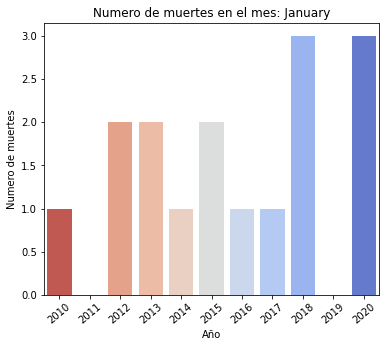

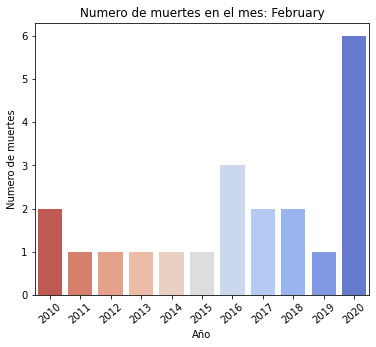

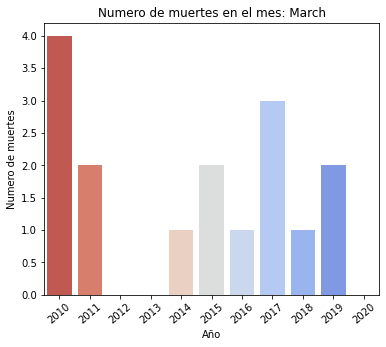

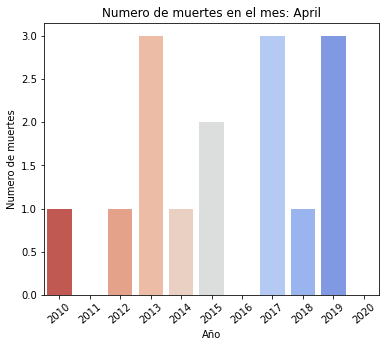

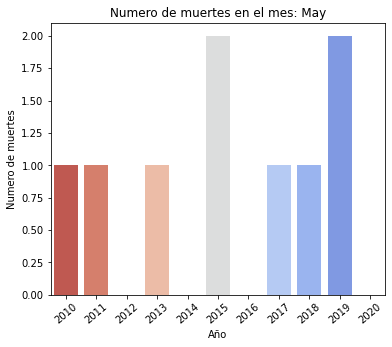

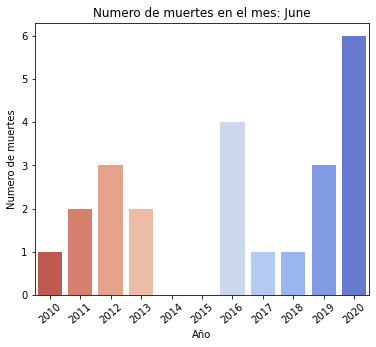

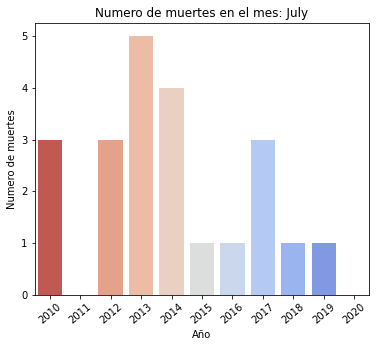

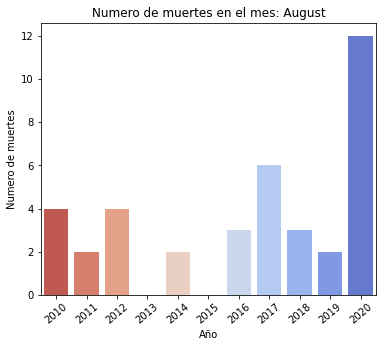

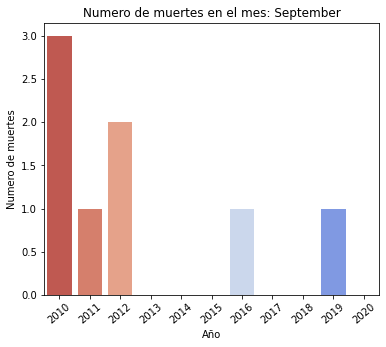

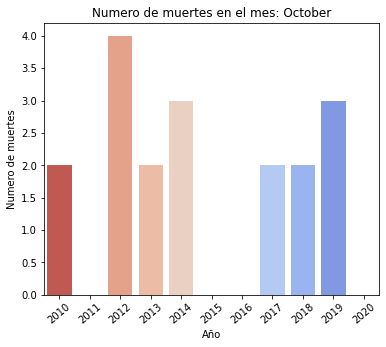

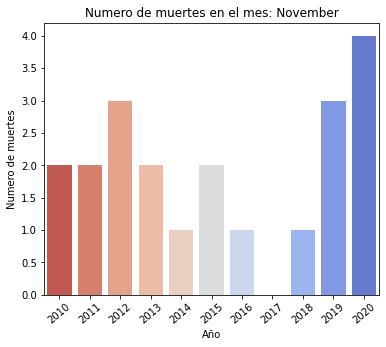

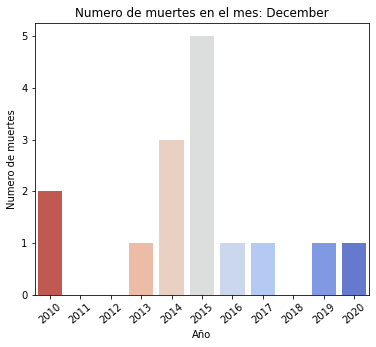

In [19]:
# Analisis de Muertes por mes
Df_Grafica = Df_Resul.copy()
ColumnaSel = ['Anio','Mes','NRO_VICTIMA_MUERTO']
Columna = ['Anio','Mes']

for i in range(1,13):
  Df_Grafica = Df_Resul.copy()
  filtro = Df_Grafica['Mes']==i
  Df_Grafica = Df_Grafica[filtro]
  Df_Grafica = Df_Grafica[ColumnaSel]
  Df_Grafica = Df_Grafica.groupby(Columna ,as_index=False).sum()
  Df_Grafica = Df_Grafica[ColumnaSel]
  f, ax1 = plt.subplots(1, 1, figsize=(6, 5))
  ax1 = sns.barplot(x="Anio", y="NRO_VICTIMA_MUERTO", data=Df_Grafica, palette="coolwarm_r",ax=ax1)
  ax1.set_title('Numero de muertes en el mes: '+time.strftime("%B", time.struct_time((0, i, 0,)+(0,)*6)))
  ax1.set_ylabel("Numero de muertes")
  ax1.set_xlabel("Año")
  plt.xticks(rotation=40)

plt.show()


Top 5 de las causas de accidente con mayor numero de heridos 



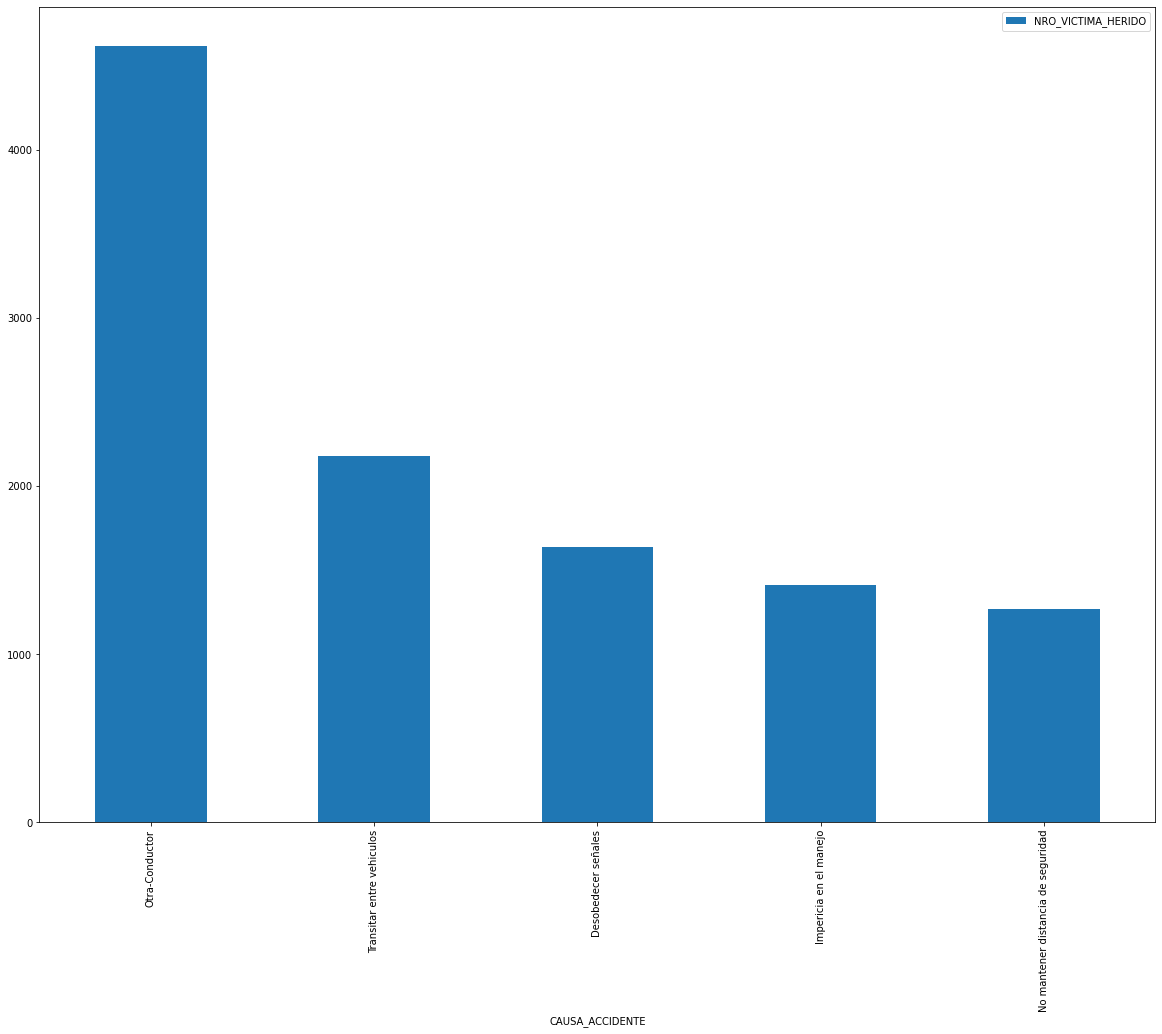

In [20]:
# Mayor causal  de heridos 
Df_Grafica = Df_Resul.copy()
ColumnaSel = ['CAUSA_ACCIDENTE','NRO_VICTIMA_HERIDO']
Df_Grafica = Df_Grafica[ColumnaSel]
Df_Grafica = Df_Grafica.groupby('CAUSA_ACCIDENTE' ,as_index=True).sum()
Df_Grafica = Df_Grafica.sort_values('NRO_VICTIMA_HERIDO', ascending=False)
# display(Df_Grafica)
Df_Grafica = Df_Grafica.head(5)
Df_Grafica.plot.bar(stacked=True,figsize=(20, 15))
print('Top 5 de las causas de accidente con mayor numero de heridos \n')

Top 5 de las causas de accidente con mayor numero de muertos 



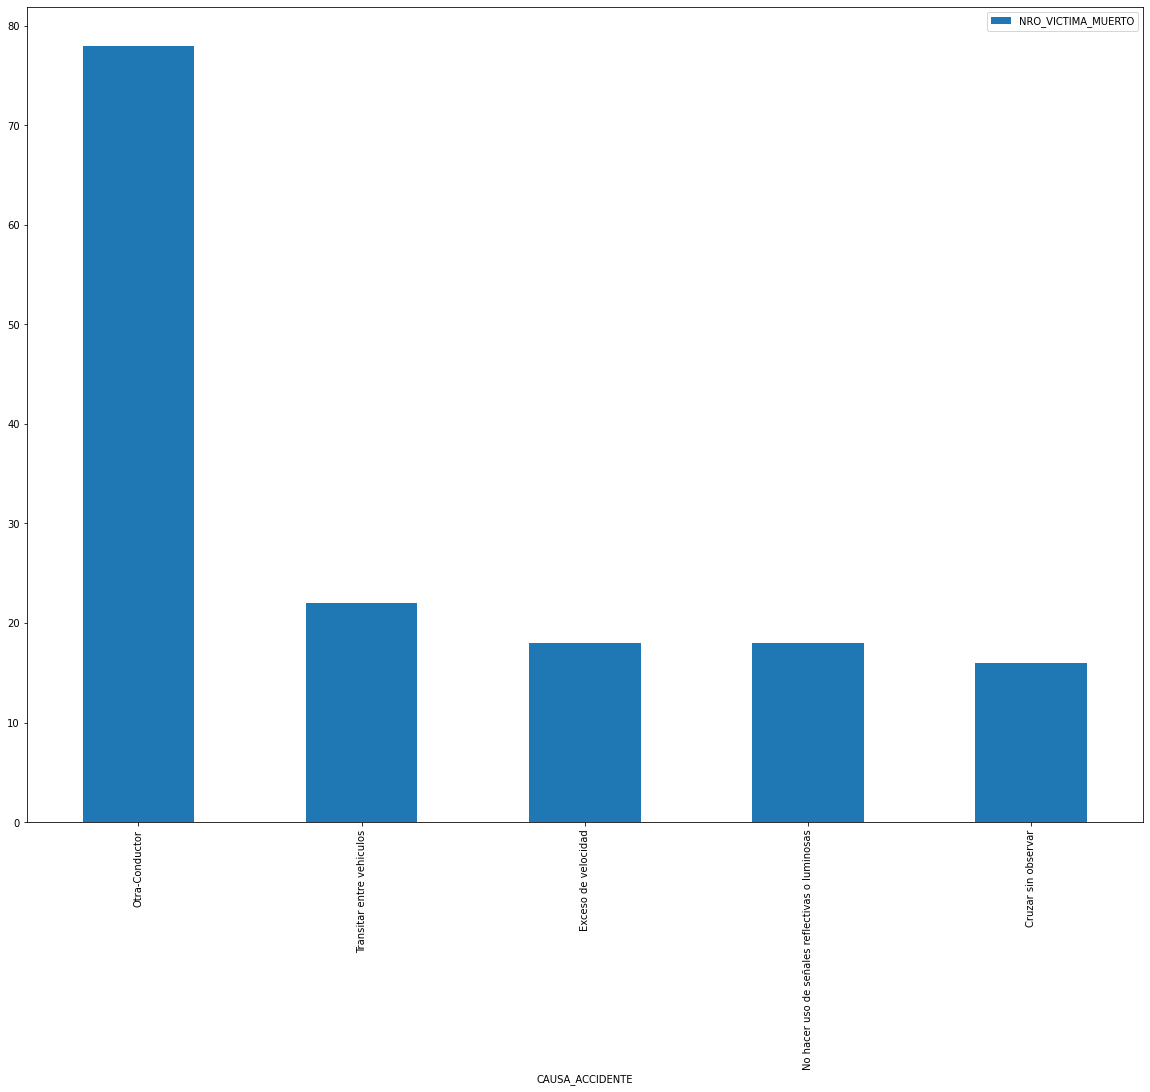

In [21]:
# Mayor causal  de muertes 
Df_Grafica = Df_Resul.copy()
ColumnaSel = ['CAUSA_ACCIDENTE','NRO_VICTIMA_MUERTO']
Df_Grafica = Df_Grafica[ColumnaSel]
Df_Grafica = Df_Grafica.groupby('CAUSA_ACCIDENTE' ,as_index=True).sum()
Df_Grafica = Df_Grafica.sort_values('NRO_VICTIMA_MUERTO', ascending=False)
# display(Df_Grafica)
Df_Grafica = Df_Grafica.head(5)
Df_Grafica.plot.bar(stacked=True,figsize=(20, 15))
print('Top 5 de las causas de accidente con mayor numero de muertos \n')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 9 Text major ticklabel objects>)

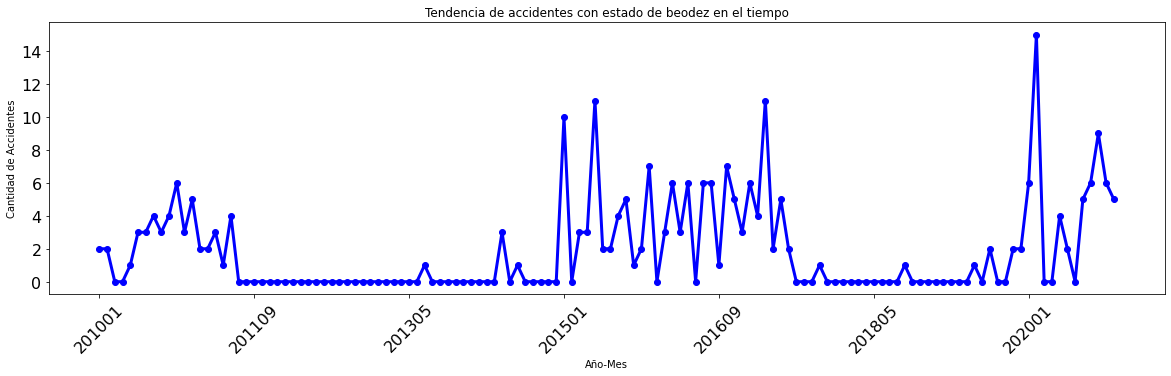

In [22]:
# Tendencia de beodez en la historia
Df_Grafica = Df_Resul.copy()
ColumnaSel = ['AnioMes','ESTADO_BEODEZ']
Df_Grafica = Df_Grafica[ColumnaSel]
Df_Grafica = Df_Grafica.groupby('AnioMes' ,as_index=True).sum()
eje=Df_Grafica[ColumnaSel[1]].plot(figsize=(20, 5),linewidth=3,color="blue",fontsize=16,marker='o',title='Tendencia de accidentes con estado de beodez en el tiempo')
eje.set_ylabel('Cantidad de Accidentes')
eje.set_xlabel('Año-Mes')
plt.xticks(rotation=45,horizontalalignment="center")

# Preprocesamiento de datos (Correlacion de variables numericas)

In [ ]:
# Correlacion entre variables (Numero de accidentes con clase de vehiculo)
# Df_Grafica = Df_Grafica[['FECHA_ACCIDENTE','HORA_ACCIDENTE','REGISTRA_ACCIDENTE','NUMERO_PLACA','CLASE_VEHICULO','TIPO_SERVICIO','LLEVA','TIPO_VICTIMA','EDAD','GENERO','GRAVEDAD','NRO_VICTIMA_Peaton','NRO_VICTIMA_ACOMPANANTE','NRO_VICTIMA_PASAJERO','NRO_VICTIMA_CONDUCTOR','NRO_VICTIMA_HERIDO','NRO_VICTIMA_MUERTO','ESTADO_BEODEZ','ESTADO_DROGA','RESULTADO_BEODEZ','LOCALIDAD_O_COMUNA','DESC_CLASE_ACCIDENTE','DESC_CHOQUE_ACCIDENTE','DESC_AREA_ACCIDENTE','DESC_SECTOR_ACCIDENTE','CONDICION_CLIMATICA','ESTADO_CALLE','CAUSA_ACCIDENTE']]
Df_Grafica = Df_Resul.copy()
Df_Grafica = Df_Grafica[['CLASE_VEHICULO','TIPO_SERVICIO','LLEVA','EDAD','GENERO','NRO_VICTIMA_Peaton','NRO_VICTIMA_ACOMPANANTE','NRO_VICTIMA_PASAJERO','NRO_VICTIMA_CONDUCTOR','NRO_VICTIMA_HERIDO','NRO_VICTIMA_MUERTO','ESTADO_BEODEZ','LOCALIDAD_O_COMUNA','CONDICION_CLIMATICA','ESTADO_CALLE','CAUSA_ACCIDENTE']]
Df_Grafica.CLASE_VEHICULO = pd.Categorical(Df_Grafica.CLASE_VEHICULO).codes
Df_Grafica.TIPO_SERVICIO = pd.Categorical(Df_Grafica.TIPO_SERVICIO).codes
Df_Grafica.LLEVA = pd.Categorical(Df_Grafica.LLEVA).codes
Df_Grafica.GENERO = pd.Categorical(Df_Grafica.GENERO).codes
Df_Grafica.ESTADO_BEODEZ = pd.Categorical(Df_Grafica.ESTADO_BEODEZ).codes
Df_Grafica.LOCALIDAD_O_COMUNA = pd.Categorical(Df_Grafica.LOCALIDAD_O_COMUNA).codes
Df_Grafica.CONDICION_CLIMATICA = pd.Categorical(Df_Grafica.CONDICION_CLIMATICA).codes
Df_Grafica.ESTADO_CALLE = pd.Categorical(Df_Grafica.ESTADO_CALLE).codes
Df_Grafica.CAUSA_ACCIDENTE = pd.Categorical(Df_Grafica.CAUSA_ACCIDENTE).codes

display(Df_Grafica)
ax1 = sns.pairplot(Df_Grafica,   kind="reg",  palette="Set2")
plt.show()

,CLASE_VEHICULO,TIPO_SERVICIO,LLEVA,EDAD,GENERO,NRO_VICTIMA_Peaton,NRO_VICTIMA_ACOMPANANTE,NRO_VICTIMA_PASAJERO,NRO_VICTIMA_CONDUCTOR,NRO_VICTIMA_HERIDO,NRO_VICTIMA_MUERTO,ESTADO_BEODEZ,LOCALIDAD_O_COMUNA,CONDICION_CLIMATICA,ESTADO_CALLE,CAUSA_ACCIDENTE
0,26,3,0,NaN,2,0.0,0.0,0.0,0.0,0.0,0.0,0,39,3,0,350
1,10,3,3,NaN,2,0.0,0.0,0.0,0.0,0.0,0.0,0,39,3,0,350
2,26,3,0,24.778058,1,0.0,0.0,0.0,1.0,1.0,0.0,0,39,3,0,350
3,3,3,3,NaN,2,0.0,0.0,0.0,0.0,0.0,0.0,0,57,3,0,350
4,26,3,0,19.324148,1,0.0,0.0,0.0,1.0,1.0,0.0,0,57,3,0,350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,26,3,0,41.150742,0,0.0,1.0,0.0,0.0,1.0,0.0,0,53,3,6,141
85418,26,3,0,47.374005,0,0.0,0.0,0.0,1.0,1.0,0.0,0,53,3,6,141
85419,3,3,4,NaN,2,0.0,0.0,0.0,0.0,0.0,0.0,0,39,3,0,4
85420,3,3,4,NaN,2,0.0,0.0,0.0,0.0,0.0,0.0,0,39,3,0,4


In [ ]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(Df_Grafica.corr(method='pearson'), annot = True, cmap="Blues")
plt.title("Correlation Mapa de calor")

In [ ]:
# analisis de correlaciones directas
Df_Correlacion = Df_Resul.copy()
# Correlacion entre clase de vehiculo y numero de victimas heridos y muertos
Df_Correlacion.CLASE_VEHICULO = pd.Categorical(Df_Correlacion.CLASE_VEHICULO).codes
c1 = round(Df_Correlacion['CLASE_VEHICULO'].corr(Df_Correlacion['NRO_VICTIMA_HERIDO']),4)
c2 = round(Df_Correlacion['CLASE_VEHICULO'].corr(Df_Correlacion['NRO_VICTIMA_MUERTO']),4)
print('Correlacion entre las clases de vehiculos comprometidos y el numero de victimas heridos : '+ str(c1))
print('Correlacion entre las clases de vehiculos comprometidos y el numero de victimas muertos : '+ str(c2))

# Correlacion entre clase de vehiculo y numero de victimas heridos y muertos
Df_Correlacion.TIPO_SERVICIO = pd.Categorical(Df_Correlacion.TIPO_SERVICIO).codes
c1 = round(Df_Correlacion['TIPO_SERVICIO'].corr(Df_Correlacion['NRO_VICTIMA_HERIDO']),4)
c2 = round(Df_Correlacion['TIPO_SERVICIO'].corr(Df_Correlacion['NRO_VICTIMA_MUERTO']),4)
print('Correlacion entre tipo de servicios de vehiculos comprometidos y el numero de victimas heridos : '+ str(c1))
print('Correlacion entre tipo de servicios de vehiculos comprometidos y el numero de victimas muertos : '+ str(c2))

# Correlacion entre clase de vehiculo y numero de victimas heridos y muertos
Df_Correlacion.LLEVA = pd.Categorical(Df_Correlacion.LLEVA).codes
c1 = round(Df_Correlacion['LLEVA'].corr(Df_Correlacion['NRO_VICTIMA_HERIDO']),4)
c2 = round(Df_Correlacion['LLEVA'].corr(Df_Correlacion['NRO_VICTIMA_MUERTO']),4)
print('Correlacion entre implementos de proteccion que llevan y el numero de victimas heridos : '+ str(c1))
print('Correlacion entre implementos de proteccion que llevan y el numero de victimas muertos : '+ str(c2))

# Correlacion entre clase de vehiculo y numero de victimas heridos y muertos
c1 = round(Df_Correlacion['EDAD'].corr(Df_Correlacion['NRO_VICTIMA_HERIDO']),4)
c2 = round(Df_Correlacion['EDAD'].corr(Df_Correlacion['NRO_VICTIMA_MUERTO']),4)
print('Correlacion entre la edad del implicado y el numero de victimas heridos : '+ str(c1))
print('Correlacion entre la edad del implicado y el numero de victimas muertos : '+ str(c2))

# Correlacion entre clase de vehiculo y numero de victimas heridos y muertos
Df_Correlacion.GENERO = pd.Categorical(Df_Correlacion.GENERO).codes
c1 = round(Df_Correlacion['GENERO'].corr(Df_Correlacion['NRO_VICTIMA_HERIDO']),4)
c2 = round(Df_Correlacion['GENERO'].corr(Df_Correlacion['NRO_VICTIMA_MUERTO']),4)
print('Correlacion entre genero y el numero de victimas heridos : '+ str(c1))
print('Correlacion entre genero y el numero de victimas muertos : '+ str(c2))


# Correlacion entre clase de vehiculo y numero de victimas heridos y muertos
c1 = round(Df_Correlacion['ESTADO_BEODEZ'].corr(Df_Correlacion['NRO_VICTIMA_HERIDO']),4)
c2 = round(Df_Correlacion['ESTADO_BEODEZ'].corr(Df_Correlacion['NRO_VICTIMA_MUERTO']),4)
print('Correlacion entre estado de beodez y el numero de victimas heridos : '+ str(c1))
print('Correlacion entre estado de beodez y el numero de victimas muertos : '+ str(c2))

# Correlacion entre clase de vehiculo y numero de victimas heridos y muertos
Df_Correlacion.LOCALIDAD_O_COMUNA = pd.Categorical(Df_Correlacion.LOCALIDAD_O_COMUNA).codes
c1 = round(Df_Correlacion['LOCALIDAD_O_COMUNA'].corr(Df_Correlacion['NRO_VICTIMA_HERIDO']),4)
c2 = round(Df_Correlacion['LOCALIDAD_O_COMUNA'].corr(Df_Correlacion['NRO_VICTIMA_MUERTO']),4)
print('Correlacion entre localidad  y el numero de victimas heridos : '+ str(c1))
print('Correlacion entre localidad y el numero de victimas muertos : '+ str(c2))

# Correlacion entre clase de vehiculo y numero de victimas heridos y muertos
Df_Correlacion.CONDICION_CLIMATICA = pd.Categorical(Df_Correlacion.CONDICION_CLIMATICA).codes
c1 = round(Df_Correlacion['CONDICION_CLIMATICA'].corr(Df_Correlacion['NRO_VICTIMA_HERIDO']),4)
c2 = round(Df_Correlacion['CONDICION_CLIMATICA'].corr(Df_Correlacion['NRO_VICTIMA_MUERTO']),4)
print('Correlacion entre condicion climatica  y el numero de victimas heridos : '+ str(c1))
print('Correlacion entre condicion climatica y el numero de victimas muertos : '+ str(c2))

# Correlacion entre clase de vehiculo y numero de victimas heridos y muertos
Df_Correlacion.ESTADO_CALLE = pd.Categorical(Df_Correlacion.ESTADO_CALLE).codes
c1 = round(Df_Correlacion['ESTADO_CALLE'].corr(Df_Correlacion['NRO_VICTIMA_HERIDO']),4)
c2 = round(Df_Correlacion['ESTADO_CALLE'].corr(Df_Correlacion['NRO_VICTIMA_MUERTO']),4)
print('Correlacion entre condicion de la calle  y el numero de victimas heridos : '+ str(c1))
print('Correlacion entre condicion de la calle y el numero de victimas muertos : '+ str(c2))

# Correlacion entre clase de vehiculo y numero de victimas heridos y muertos
Df_Correlacion.CAUSA_ACCIDENTE = pd.Categorical(Df_Correlacion.CAUSA_ACCIDENTE).codes
c1 = round(Df_Correlacion['CAUSA_ACCIDENTE'].corr(Df_Correlacion['NRO_VICTIMA_HERIDO']),4)
c2 = round(Df_Correlacion['CAUSA_ACCIDENTE'].corr(Df_Correlacion['NRO_VICTIMA_MUERTO']),4)
print('Correlacion entre causa del accidente y el numero de victimas heridos : '+ str(c1))
print('Correlacion entre causa del accidente y el numero de victimas muertos : '+ str(c2))

# Correlacion entre clase de vehiculo y numero de victimas heridos y muertos
Df_Correlacion.CAUSA_ACCIDENTE = pd.Categorical(Df_Correlacion.CAUSA_ACCIDENTE).codes
c1 = round(Df_Correlacion['CAUSA_ACCIDENTE'].corr(Df_Correlacion['EDAD']),4)
print('Correlacion entre causa del accidente y la edad : '+ str(c1))

# Correlacion entre clase de vehiculo y numero de victimas heridos y muertos
Df_Correlacion.LOCALIDAD_O_COMUNA = pd.Categorical(Df_Correlacion.LOCALIDAD_O_COMUNA).codes
Df_Correlacion.CAUSA_ACCIDENTE = pd.Categorical(Df_Correlacion.CAUSA_ACCIDENTE).codes
print('Correlacion entre causa del accidente y comuna : '+ str(c1))





# Relacion de variables categoricas

In [ ]:
# tabla de contingencia en porcentajes relativos segun sobreviviente

Df_Grafica = Df_Resul.copy()
pd.crosstab(index=Df_Grafica['CLASE_VEHICULO'], columns=Df_Grafica['NRO_VICTIMA_HERIDO']
           ).apply(lambda r: r/r.sum() *100, axis=1)

In [ ]:
# tabla de contingencia en porcentajes relativos segun sobreviviente

Df_Grafica = Df_Resul.copy()
print('Relacion entre clase de vehiculo y numero de muertos en accidentes')
pd.crosstab(index=Df_Grafica['CLASE_VEHICULO'], columns=Df_Grafica['NRO_VICTIMA_MUERTO']
           ).apply(lambda r: r/r.sum() *100, axis=1)

In [ ]:
# tabla de contingencia en porcentajes relativos segun sobreviviente

Df_Grafica = Df_Resul.copy()
print('Relacion entre edad y numero de heridos en accidentes')
pd.crosstab(index=Df_Grafica['Rango_edad_Des'], columns=Df_Grafica['NRO_VICTIMA_HERIDO']
           ).apply(lambda r: r/r.sum() *100, axis=1)


In [ ]:
Df_Grafica = Df_Resul.copy()

print('Relacion entre edad y numero de muertos en accidentes')
pd.crosstab(index=Df_Grafica['Rango_edad_Des'], columns=Df_Grafica['NRO_VICTIMA_MUERTO']
           ).apply(lambda r: r/r.sum() *100, axis=1)

In [ ]:
Df_Grafica = Df_Resul.copy()

print('Relacion entre tipo de servicio y numero de muertos en accidentes')
pd.crosstab(index=Df_Grafica['TIPO_SERVICIO'], columns=Df_Grafica['NRO_VICTIMA_MUERTO']
           ).apply(lambda r: r/r.sum() *100, axis=1)

In [ ]:
Df_Grafica = Df_Resul.copy()
print('Relacion entre tipo de servicio y numero de heridos en accidentes')
pd.crosstab(index=Df_Grafica['TIPO_SERVICIO'], columns=Df_Grafica['NRO_VICTIMA_HERIDO']
           ).apply(lambda r: r/r.sum() *100, axis=1)

In [ ]:
Df_Grafica = Df_Resul.copy()
print('Relacion entre genero y numero de heridos en accidentes')
pd.crosstab(index=Df_Grafica['GENERO'], columns=Df_Grafica['NRO_VICTIMA_HERIDO']
           ).apply(lambda r: r/r.sum() *100, axis=1)

In [ ]:
Df_Grafica = Df_Resul.copy()
print('Relacion entre genero y numero de muertos en accidentes')
pd.crosstab(index=Df_Grafica['GENERO'], columns=Df_Grafica['NRO_VICTIMA_MUERTO']
           ).apply(lambda r: r/r.sum() *100, axis=1)

In [ ]:
Df_Grafica = Df_Resul.copy()
print('Relacion entre genero y numero de muertos en accidentes')
pd.crosstab(index=Df_Grafica['Dia'], columns=Df_Grafica['NRO_VICTIMA_MUERTO']
           ).apply(lambda r: r/r.sum() *100, axis=1)

In [ ]:
Df_Grafica = Df_Resul.copy()
print('Relacion entre genero y numero de heridos en accidentes')
pd.crosstab(index=Df_Grafica['Dia'], columns=Df_Grafica['NRO_VICTIMA_HERIDO']
           ).apply(lambda r: r/r.sum() *100, axis=1)